## Problem Statement

**Description**

**Context**

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

**Objective**

To predict whether a liability customer will buy a personal loans, to understand which customer attributes are most significant in driving purchases, and to identify Which segment of customers to target more.

**Data Dictionary**
ID: Customer ID

Age: Customer’s age in completed years

Experience: #years of professional experience

Income: Annual income of the customer (in thousand dollars)

ZIP Code: Home Address ZIP code.

Family: the Family size of the customer

CCAvg: Average spending on credit cards per month (in thousand dollars)

Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional

Mortgage: Value of house mortgage if any. (in thousand dollars)

Personal_Loan: Did this customer accept the personal loan offered in the last campaign?

Securities_Account: Does the customer have securities account with the bank?

CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?

Online: Do customers use internet banking facilities?

CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

## Importing the necessary libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV

# To build model for prediction
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
    roc_auc_score,
    roc_curve,
    precision_recall_curve
)

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

## Loading the dataset

In [ ]:
# uncomment and run the following line if using Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/My Drive/Python Course/Loan.csv")

# **Data background and contents**

**Checking the data shape**

In [ ]:
# checking the shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 5000 rows and 14 columns.


In [ ]:
# Data sample
data.sample(10, random_state=2)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
3566,3567,57,33,80,92064,2,2.80000,1,0,0,0,0,1,1
4252,4253,54,29,81,91107,1,0.10000,3,0,0,0,0,0,0
1918,1919,39,9,118,93555,2,6.00000,3,246,1,0,1,1,1
4111,4112,43,17,21,95351,3,1.50000,1,0,0,0,0,0,0
1471,1472,52,26,180,94305,1,1.00000,1,0,0,0,0,1,1
929,930,55,30,22,92121,1,1.50000,2,91,0,0,0,0,1
1916,1917,57,32,64,95138,3,1.60000,3,0,0,0,0,1,0
3995,3996,53,28,34,92697,2,0.60000,3,0,0,0,0,1,1
1130,1131,58,32,191,94402,1,2.90000,1,0,0,0,0,0,0
1723,1724,39,15,55,95821,1,1.50000,3,0,0,0,0,1,0


Looking at the data, we do not need ID so we will drop it right away

In [ ]:
data.drop('ID',axis=1,inplace = True)
# reset the indexes
data.reset_index()

,index,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,0,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0
1,1,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0
2,2,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0
3,3,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0
4,4,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,29,3,40,92697,1,1.90000,3,0,0,0,0,1,0
4996,4996,30,4,15,92037,4,0.40000,1,85,0,0,0,1,0
4997,4997,63,39,24,93023,2,0.30000,3,0,0,0,0,0,0
4998,4998,65,40,49,90034,3,0.50000,2,0,0,0,0,1,0


In [ ]:
# Data sample
data.sample(5, random_state=2)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
3566,57,33,80,92064,2,2.80000,1,0,0,0,0,1,1
4252,54,29,81,91107,1,0.10000,3,0,0,0,0,0,0
1918,39,9,118,93555,2,6.00000,3,246,1,0,1,1,1
4111,43,17,21,95351,3,1.50000,1,0,0,0,0,0,0
1471,52,26,180,94305,1,1.00000,1,0,0,0,0,1,1


**Check column structure**

In [ ]:
data.info()# checking column datatypes and number of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


**Observations**

We have 12 Integer, 1 Float columns in the dataset

**Check for missing values**

In [ ]:
#Checking for missing values
data.isnull().sum()

,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0
Securities_Account,0


**Observations**

We have no missing values in the dataset

**Checking duplicates**

In [ ]:
# Check for duplicated values
data.duplicated().sum()
data.loc[data.duplicated()]


,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard


**Observations**

We seem to have no duplicates in the dataset

**Statistical Summary of the Data**

In [ ]:
data.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Age,5000.00000,45.33840,11.46317,23.00000,35.00000,45.00000,55.00000,67.00000
Experience,5000.00000,20.10460,11.46795,-3.00000,10.00000,20.00000,30.00000,43.00000
Income,5000.00000,73.77420,46.03373,8.00000,39.00000,64.00000,98.00000,224.00000
ZIPCode,5000.00000,93169.25700,1759.45509,90005.00000,91911.00000,93437.00000,94608.00000,96651.00000
Family,5000.00000,2.39640,1.14766,1.00000,1.00000,2.00000,3.00000,4.00000
CCAvg,5000.00000,1.93794,1.74766,0.00000,0.70000,1.50000,2.50000,10.00000
Education,5000.00000,1.88100,0.83987,1.00000,1.00000,2.00000,3.00000,3.00000
Mortgage,5000.00000,56.49880,101.71380,0.00000,0.00000,0.00000,101.00000,635.00000
Personal_Loan,5000.00000,0.09600,0.29462,0.00000,0.00000,0.00000,0.00000,1.00000
Securities_Account,5000.00000,0.10440,0.30581,0.00000,0.00000,0.00000,0.00000,1.00000


**Observations**

• The average age of the customers is 45, with a minimum age of 23 and max age of 67 years. Over 50% of the customers in the dataset are aged 50 years and above

• There seems to be an error on the minimum professional experience age (-3) but the maximum age of customers is 43 years with a combined average professional experience of 20 years.

• Income ranges from 8,000 USD TO 224,000 USD with an average income of approximately 74,000 USD

• Additionally, 50% of all customers in the dataset have incomes of 64,000 USD and above

• Zipcodes are not clear and need to be checked and formatted accordingly

• The average family size for each customer is 2 with 50% of all customers having a family size of 2 and above.

• The average spending on credit cards is approximately 2,000 USD per month

• The average value of mortgages held by each customer is around 56,000 USD with a standard deviation of 101,000 USD(needs further analysis).

• Education Level, Personal Loan Accounts, Securities_Account, and CD_Account statistics are not clear as they are set as classification variables. Separate analysis is to be done to have a clear picture of each


# Exploratory Data Analysis

**Create important functions for our EDA**

In [ ]:
# Let us create some important functions that we will use for our EDA

# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )

### function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#Function to display a correlation heat map
def correlation_heatmap(data):
    plt.figure(figsize = (15,7))
    plt.title('Correlation Heat Map', y=1.05, size=19)
    sns.heatmap(data.corr(), cmap='Spectral',annot=True, fmt='.2f')

**Univariate Analysis**

**Age Column**

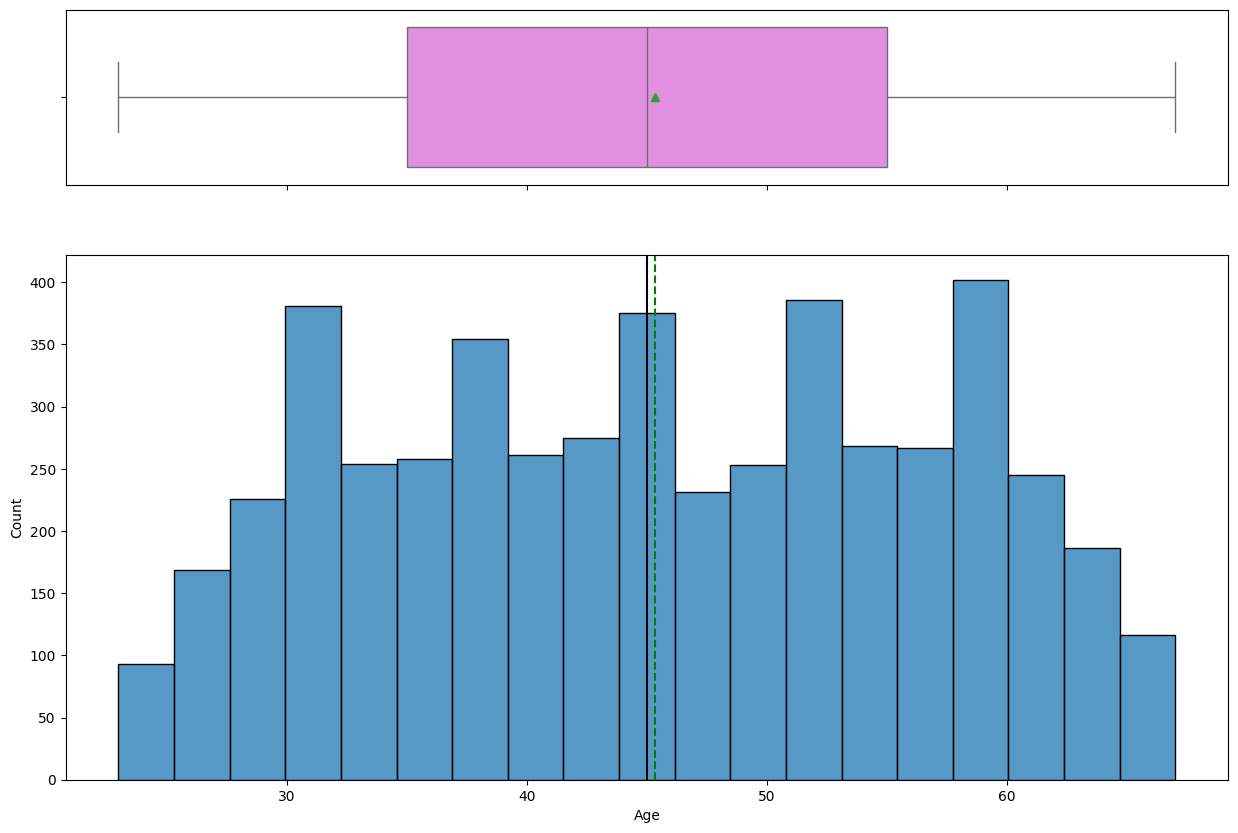

In [ ]:
histogram_boxplot(data, "Age")

**Observations**

The distribution of the age column is normal with negligible right skewness.

**Experience Column**

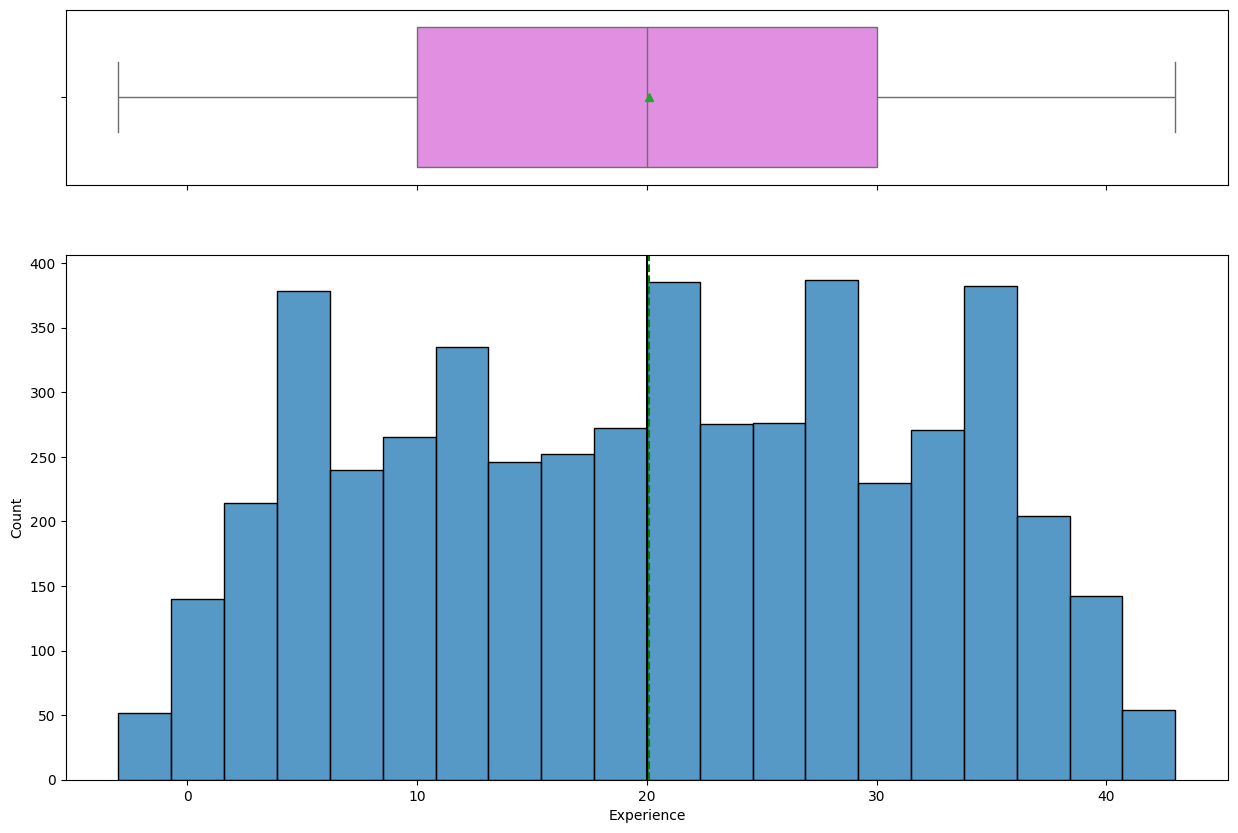

In [ ]:
histogram_boxplot(data, "Experience")

**Observations**

The distribution of the Experience column is normal with negligible right skewness.

**Income Column**

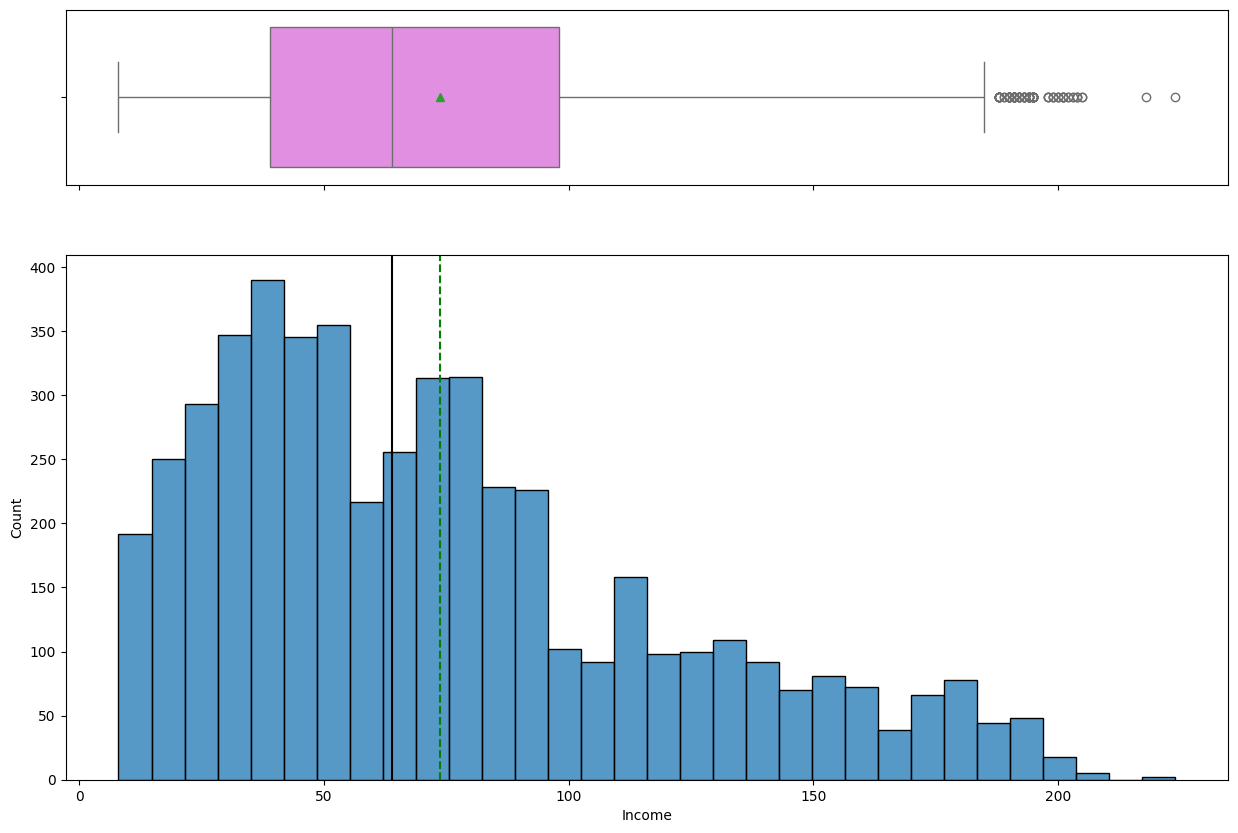

In [ ]:
histogram_boxplot(data, "Income")

**Observations**

• The distribution of Income is right skewed

• This means that we have few customers earning more than the median income of 98K USD

• We observe outliers in these columns that need to be checked or treated



**Family Size**

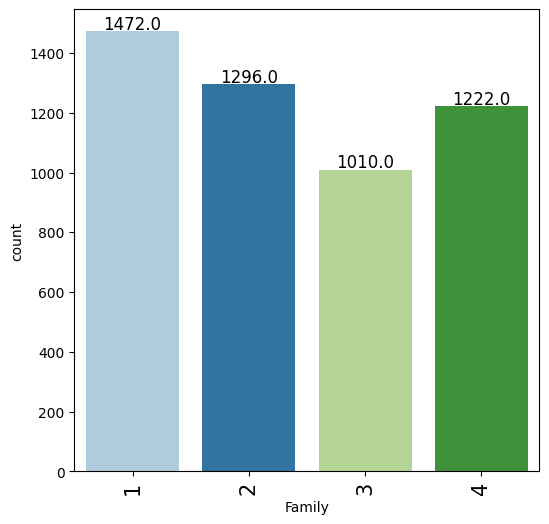

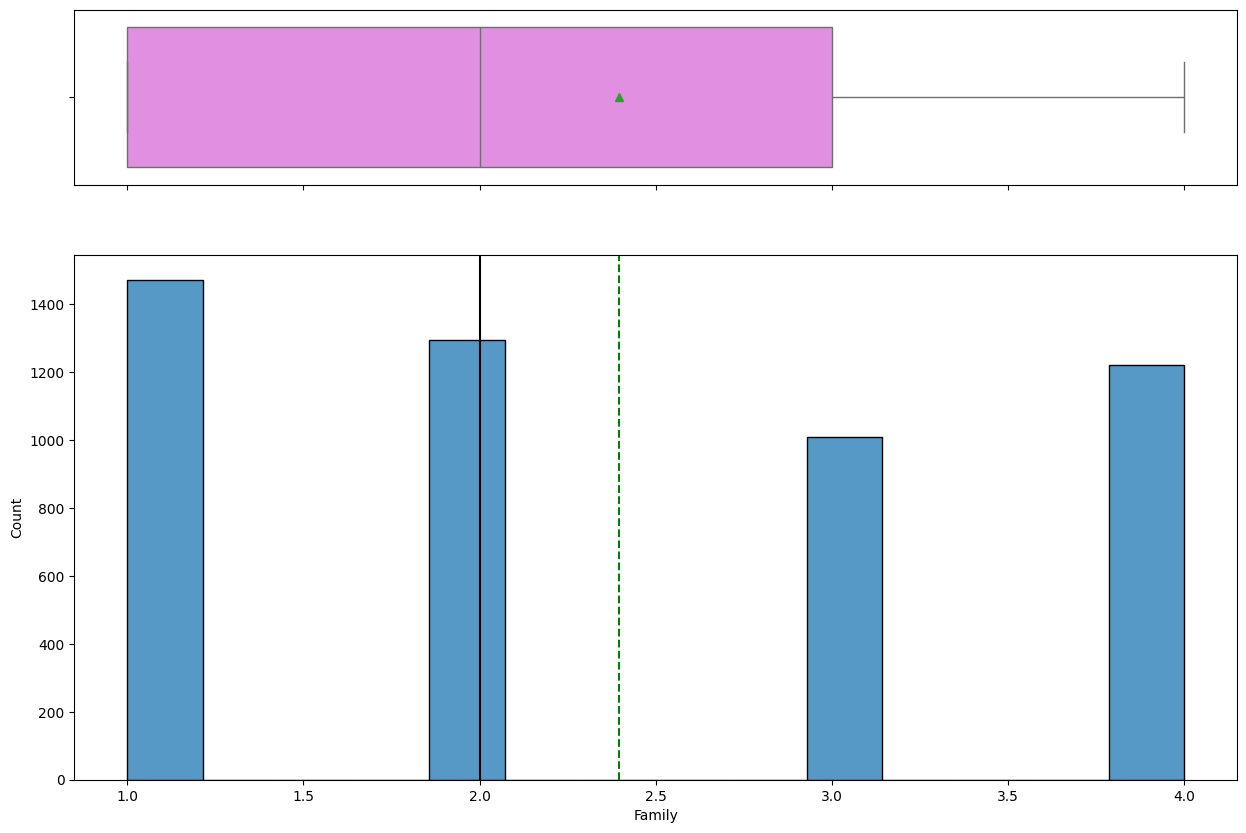

In [ ]:
labeled_barplot(data, "Family")
histogram_boxplot(data, "Family")

**Observations**

• From the box plot, Family distribution seems to be right skewed but not clear on the histplot.

• Majority of the customers have a family size of 1. This could infer that unmarried customers constitute the majority.



**CCVG - Average Spending on Credit Cards**

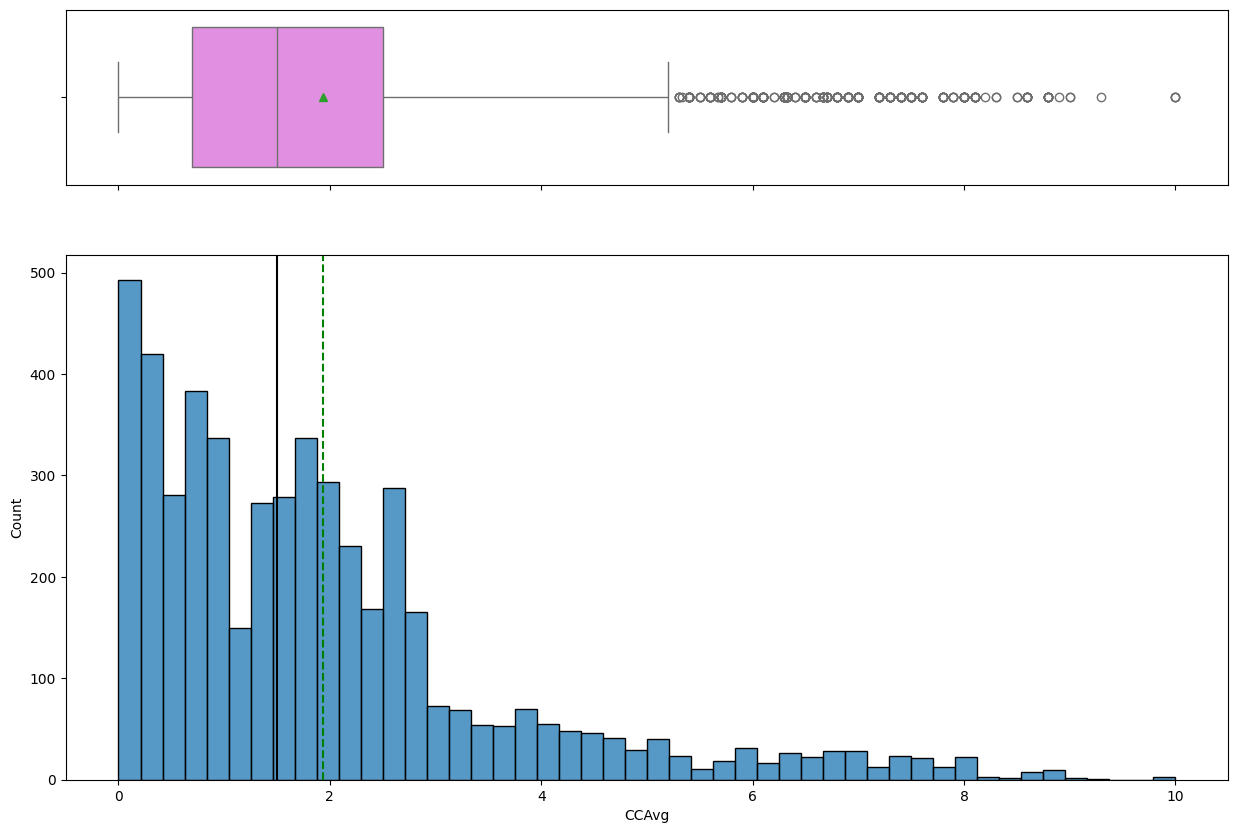

In [ ]:
histogram_boxplot(data, "CCAvg")

**Observations**

•	Distribution for this Column is Skewed to the right

•	We observe outliers in the column


**Education**

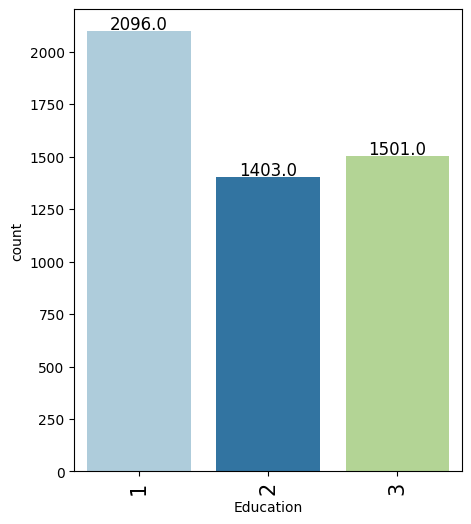

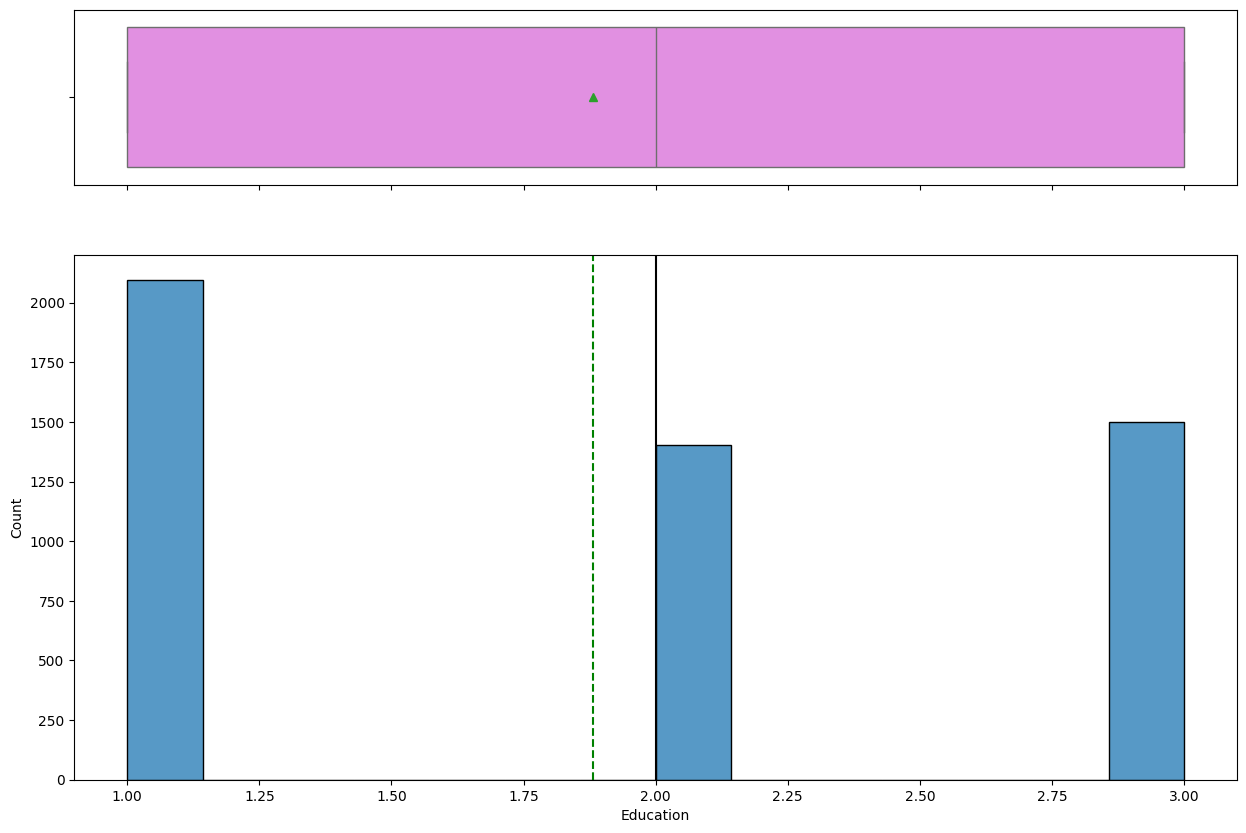

In [ ]:
labeled_barplot(data, "Education")
histogram_boxplot(data, "Education")

**Observations**

• The distribution for education is slightly skewed to the right

• Customers with Undergrad education form the majority of the dataset



**Mortgage**

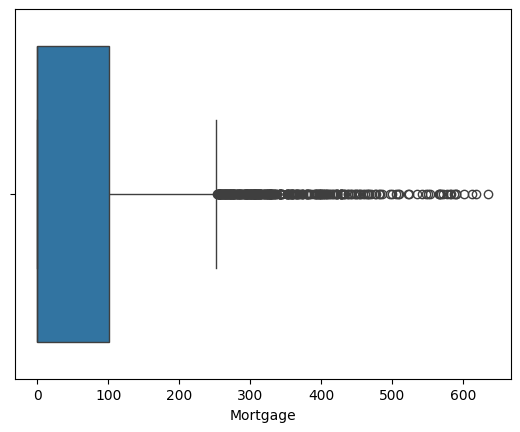

In [ ]:
sns.boxplot(data=data, x="Mortgage")
plt.show()

**Observations**

• Mortgage distribution seems to be heavily skewed to the right

• We observe many outliers in these columns and call for further investigation



In [ ]:
#Function to plot pie chart
def pie_plot(df,feature,title):
    pyfig, axis1 = plt.subplots()
    explode = (0, 0.15)
    axis1.pie(df[feature], explode=explode, labels=loan_stats["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
    axis1.axis('equal')
    plt.title(title)
    plt.show()

**Personal Loan**

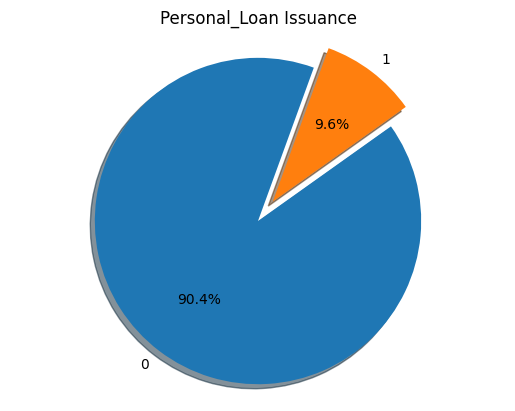

In [ ]:
loan_stats =pd.DataFrame( data['Personal_Loan'].value_counts(normalize=True)).reset_index()
loan_stats.columns =["Labels","Personal Loan"]
pie_plot(loan_stats,"Personal Loan","Personal_Loan Issuance")

**Observations**

• Only 9.6% of the customers accepted personal loans offered during the last campaign

• We observe quite a several customers not accepting personal loans.

• This gives us a sneak peek of behavior as We need to build a model that will help us to identify customers who can accept the facility.



**Securities Account**

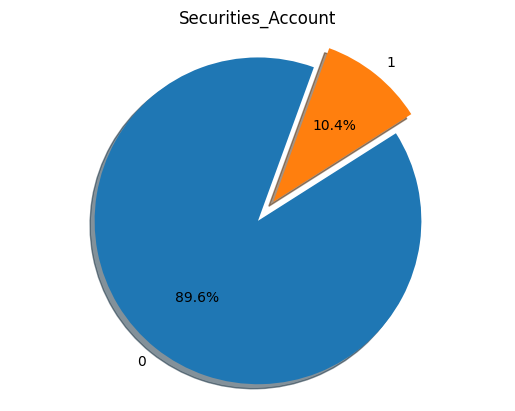

In [ ]:
securities_stats =pd.DataFrame(data['Securities_Account'].value_counts(normalize=True)).reset_index()
securities_stats.columns =["Labels","Securities_Account"]
securities_stats
pie_plot(securities_stats,"Securities_Account","Securities_Account")

**Observations**

Further only 10.4% of customers have securities with the bank

**CD_Account**

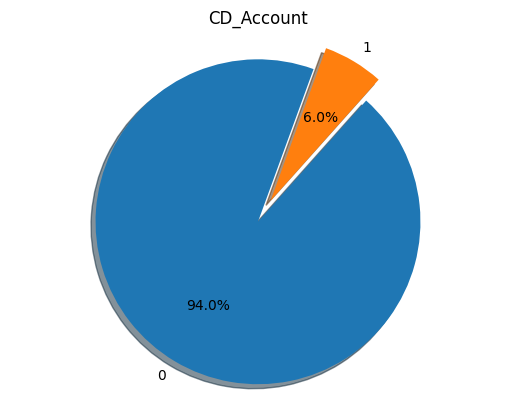

In [ ]:
cd_Account =pd.DataFrame(data['CD_Account'].value_counts(normalize=True)).reset_index()
cd_Account.columns =["Labels","CD_Account"]
cd_Account
pie_plot(cd_Account,"CD_Account","CD_Account")

**Observations**

Only 6% of customers have a certificate of deposit with the bank

**Online**

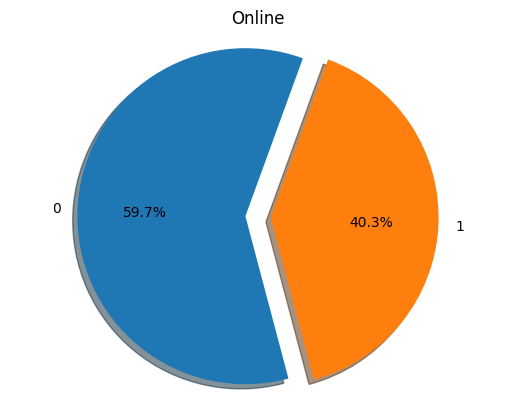

In [ ]:
online_stats =pd.DataFrame(data['Online'].value_counts(normalize=True)).reset_index()
online_stats.columns =["Labels","Online"]
online_stats
pie_plot(online_stats,"Online","Online")

**Observations**

Approximately 60% of the bank's customers use Internet banking facilities offered by the bank, while 40% do not use the facility

**Credit Card**

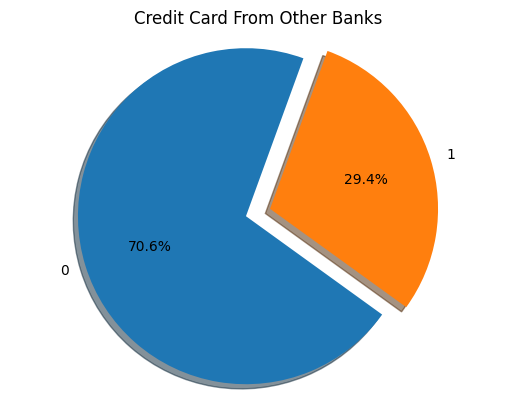

In [ ]:
creditcard_stats =pd.DataFrame(data['CreditCard'].value_counts(normalize=True)).reset_index()
creditcard_stats.columns =["Labels","CreditCard"]
creditcard_stats
pie_plot(creditcard_stats,"CreditCard","Credit Card From Other Banks")

**Observations**

Only 29% of customers use credit card facilities by other banks

**Bivariate analysis**

Goal of Bivariate analysis is to find inter-dependencies between features.

**Pair Plot**

In [ ]:
sns.pairplot(data)

**Observations**

•	Experience and Age are strongly correlated

•	Age distribution is normal

•	Experience distribution is also normal

•	The ZIP Codes column does not seem to have any relationship with Personal_Loan

•	Family and Education have a relatively low correlation with Personal_Loan


In [ ]:
# # Compute correlation for all columns
# plt.figure(figsize=(10,5))
# sns.heatmap(data.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1,linewidths=5) ##Create heatmap and see the correlation between numerical variables.


**Analysis of each Variable With Respect to Target**

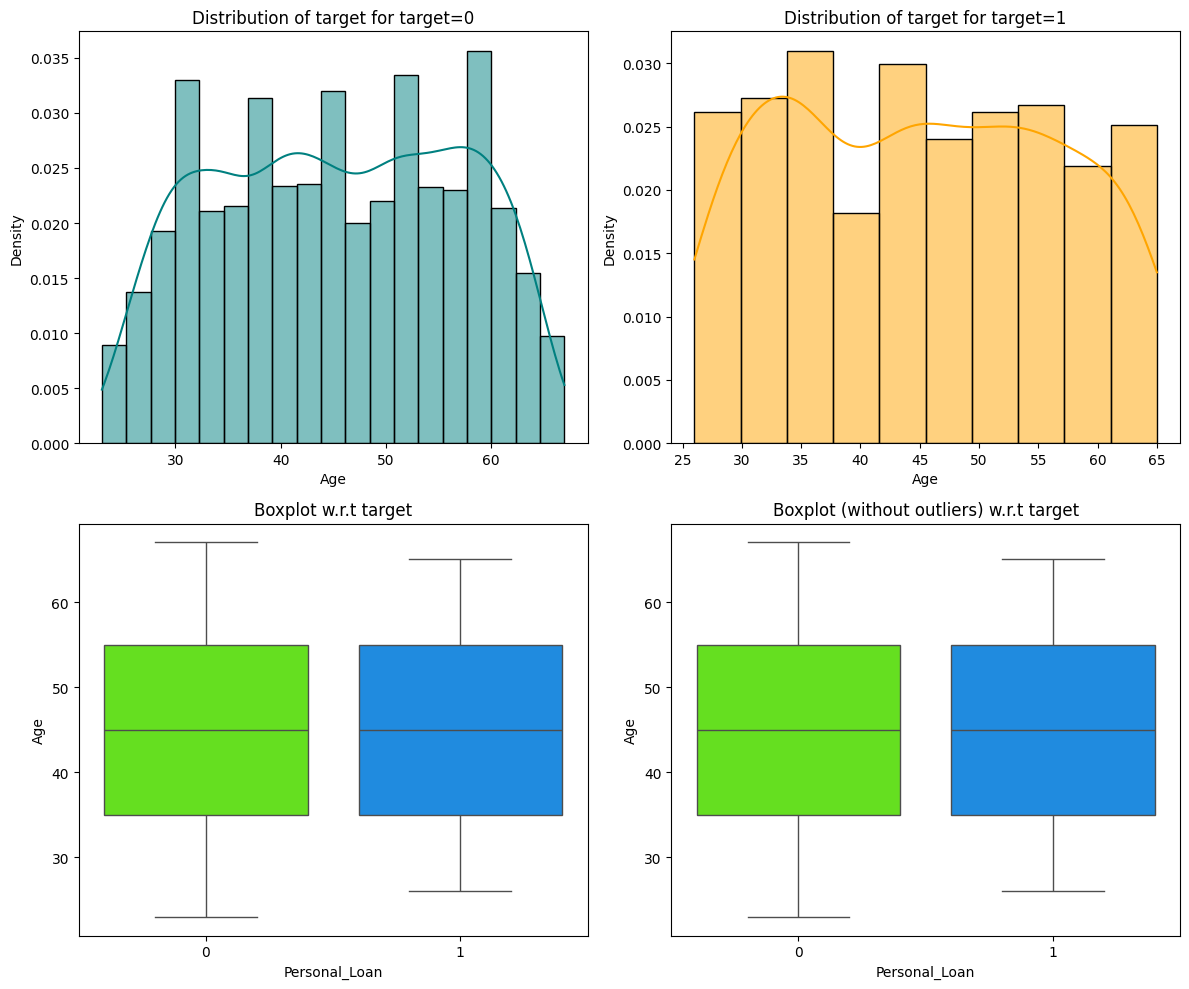

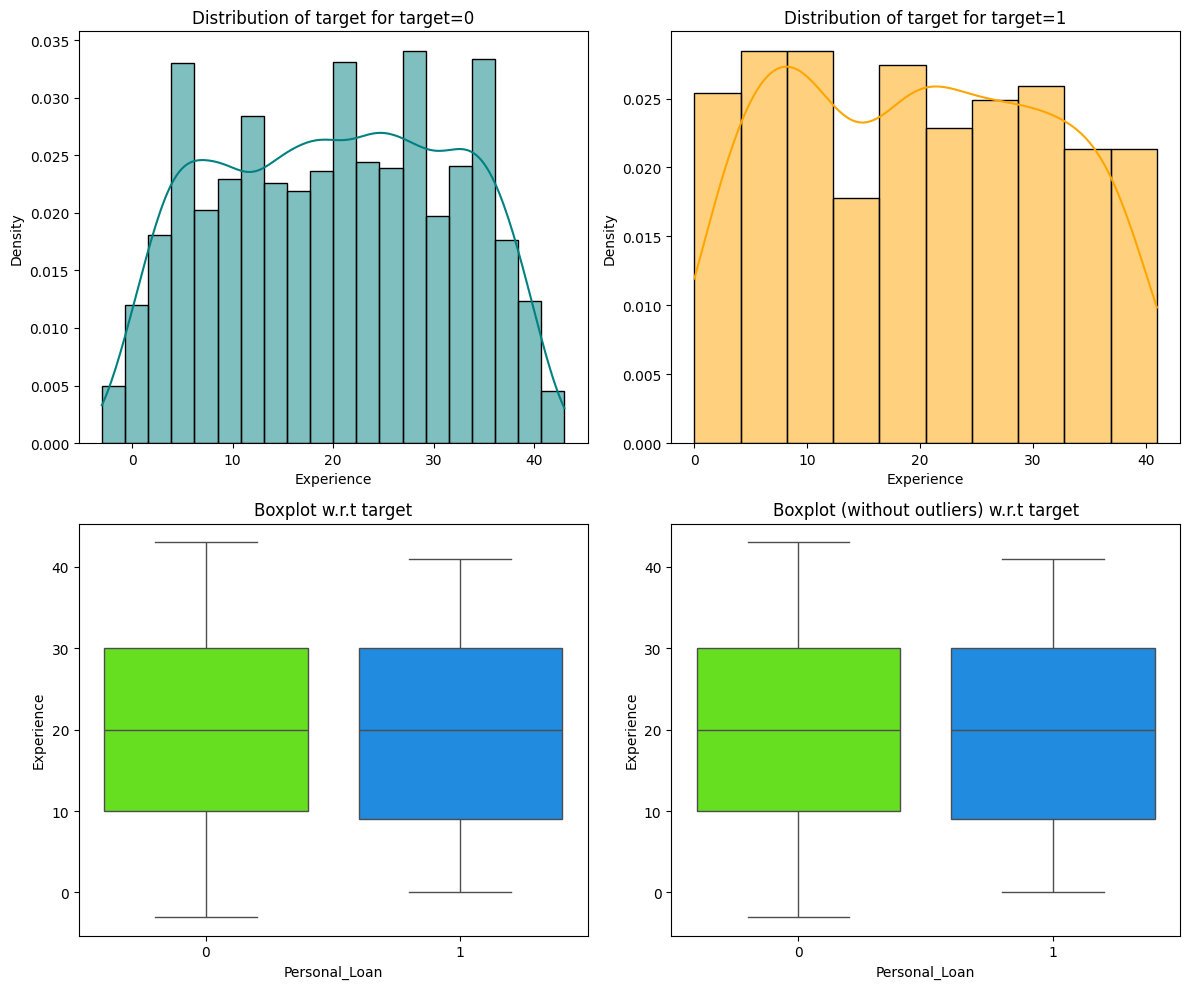

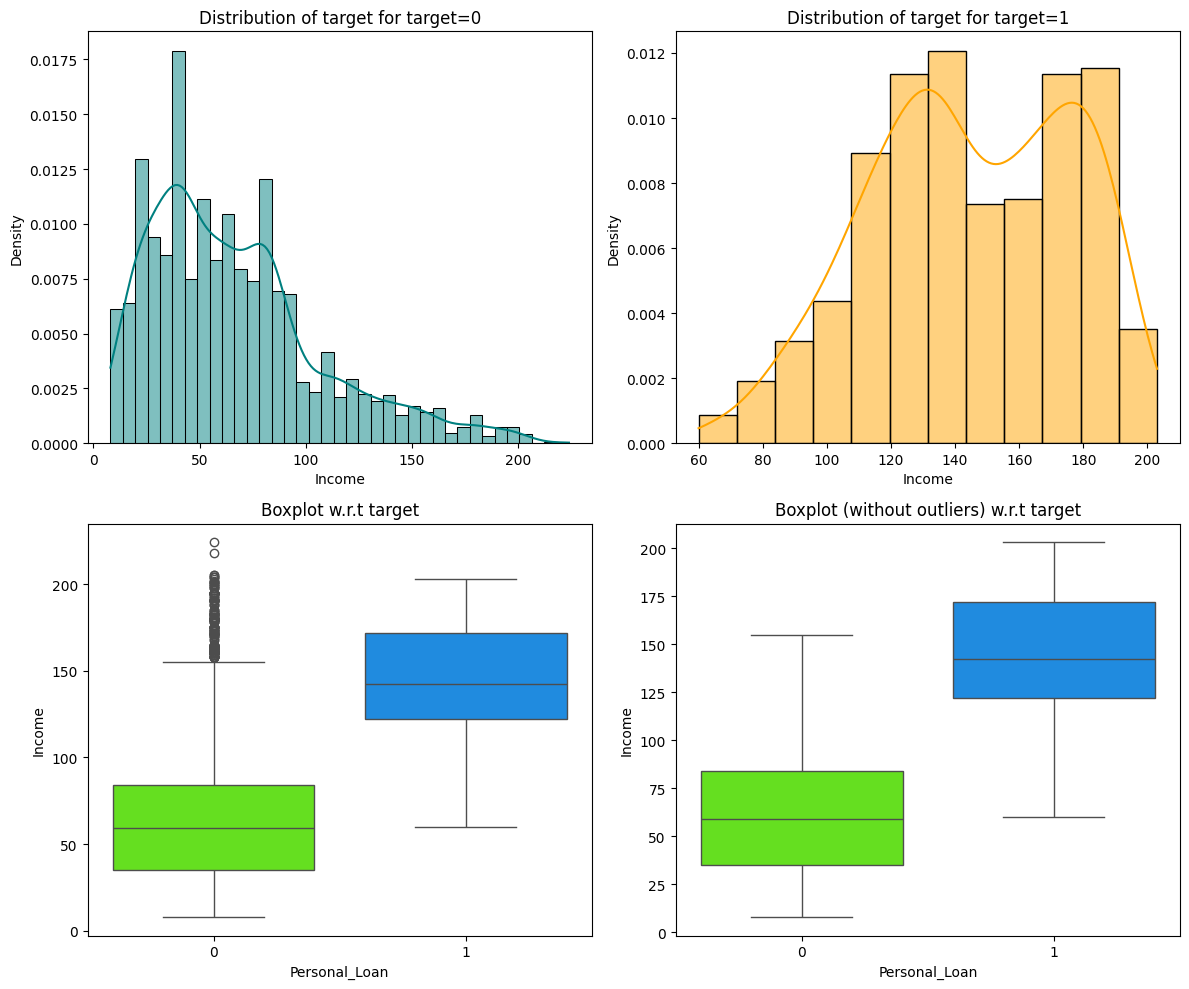

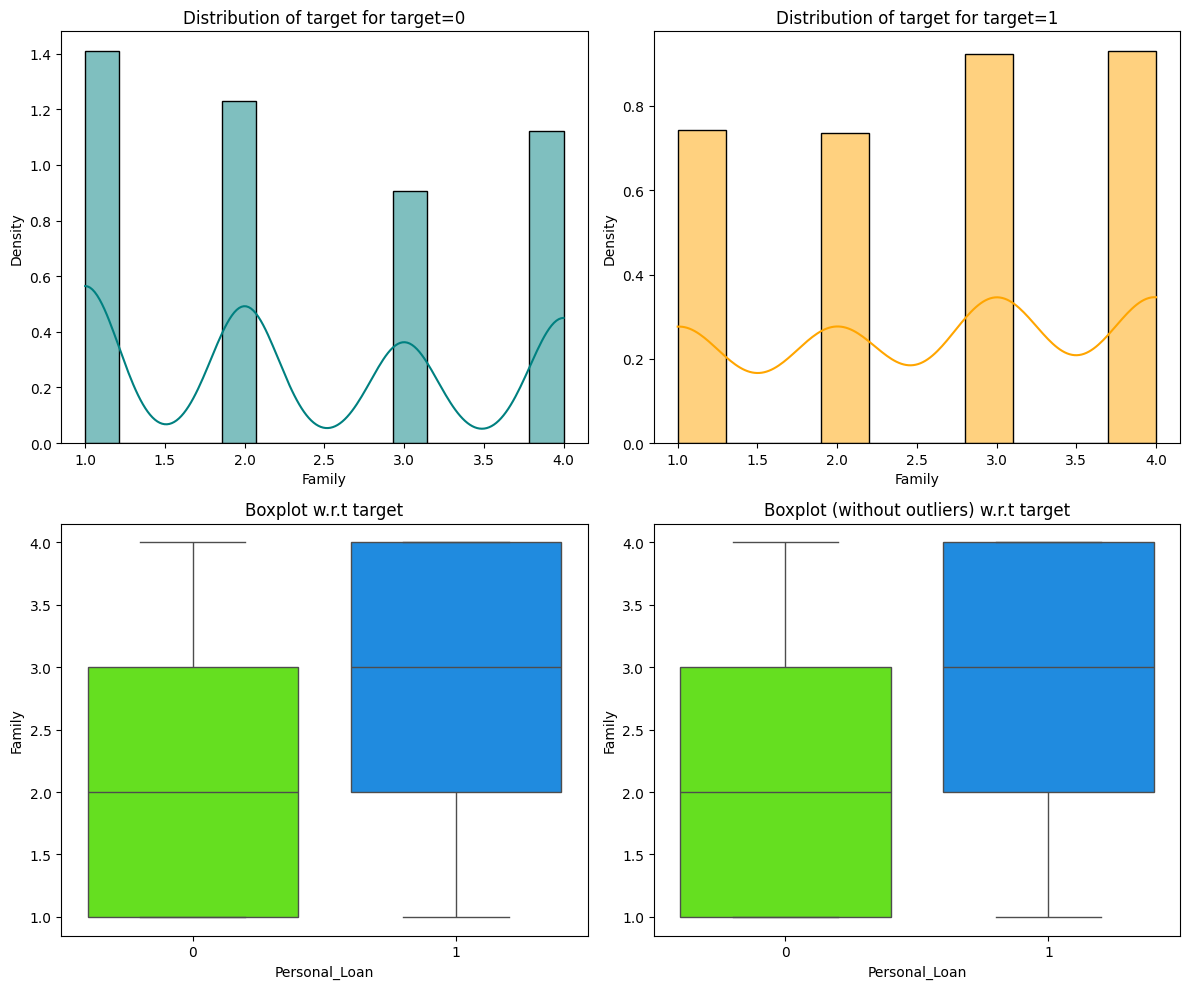

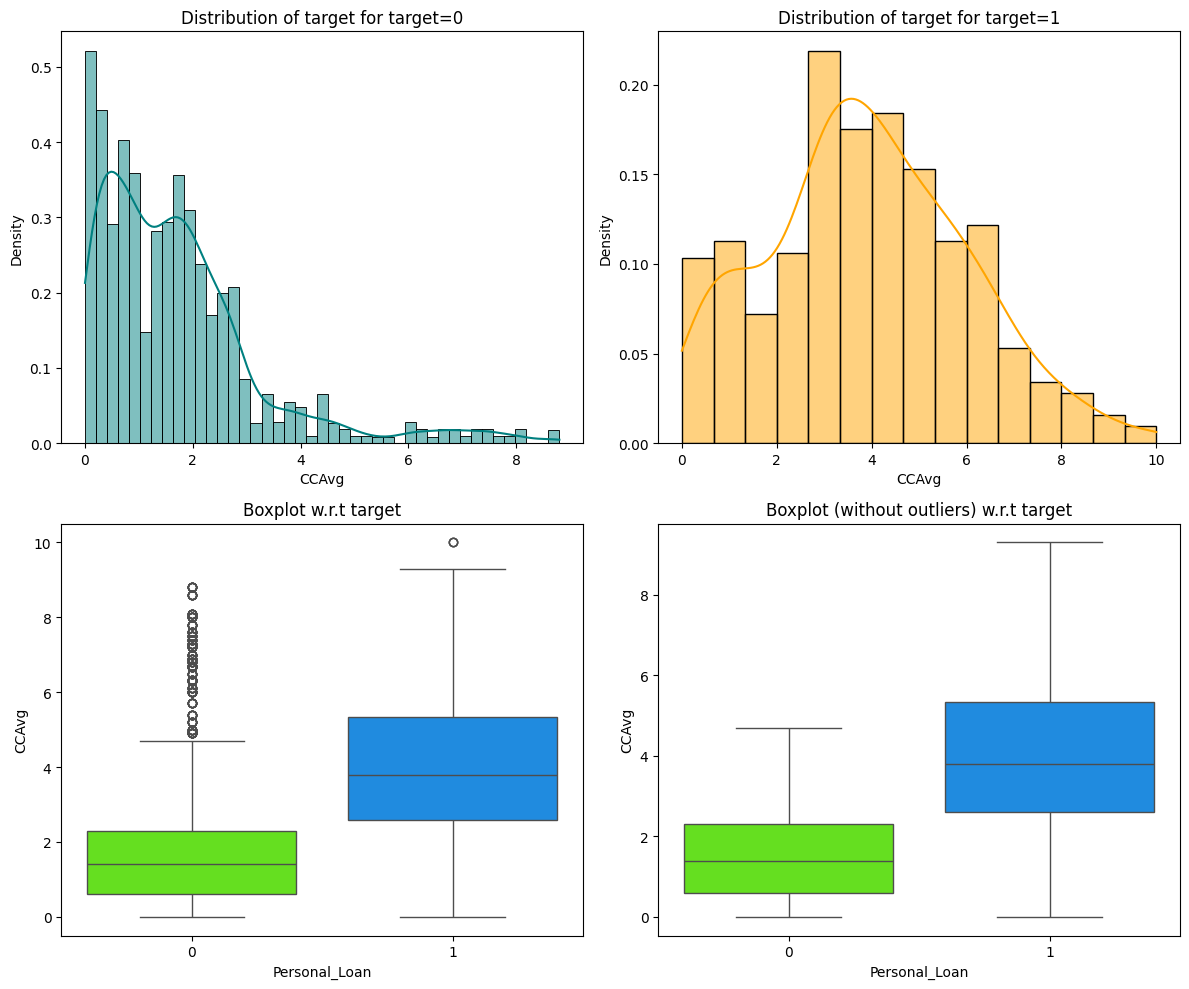

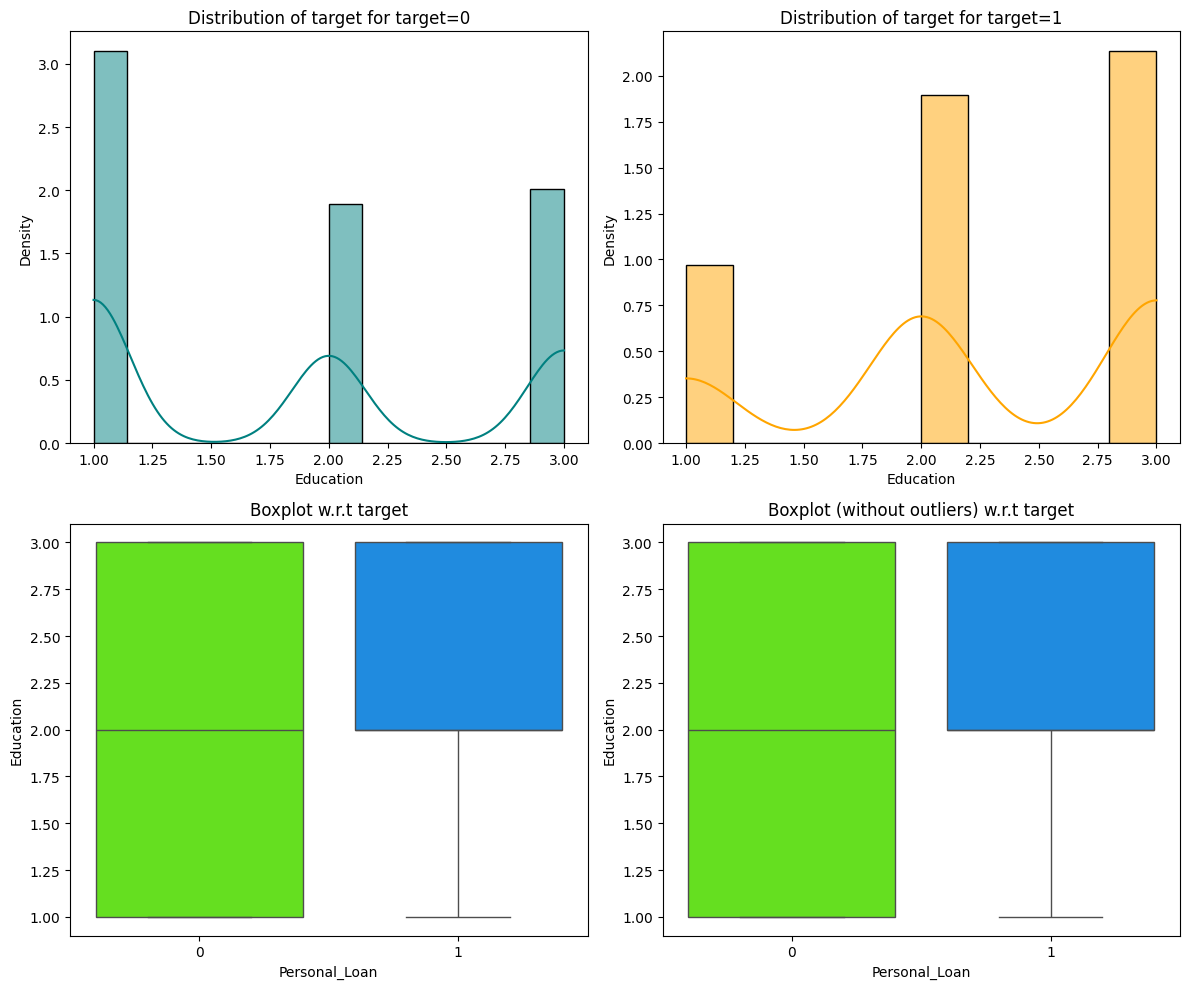

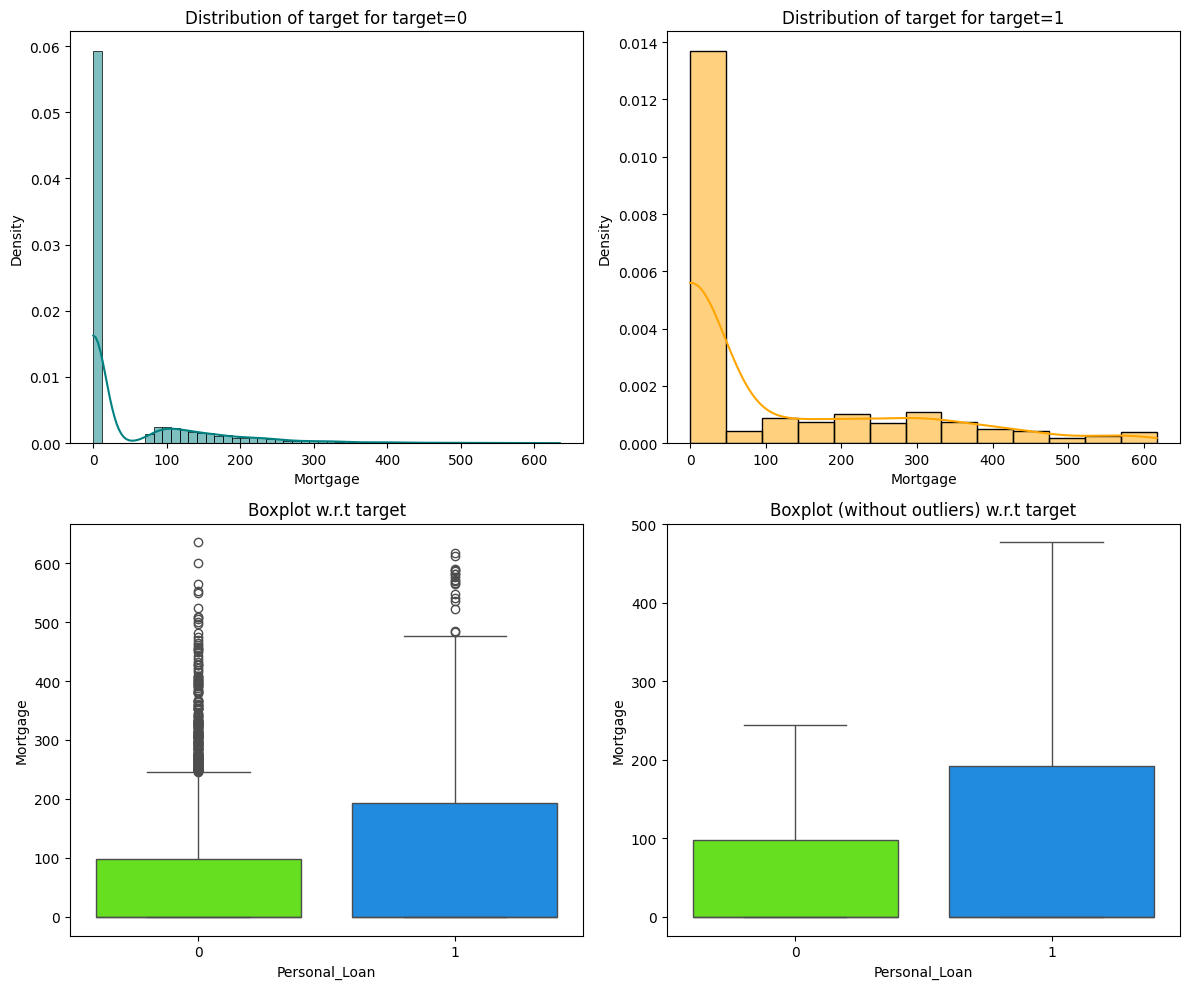

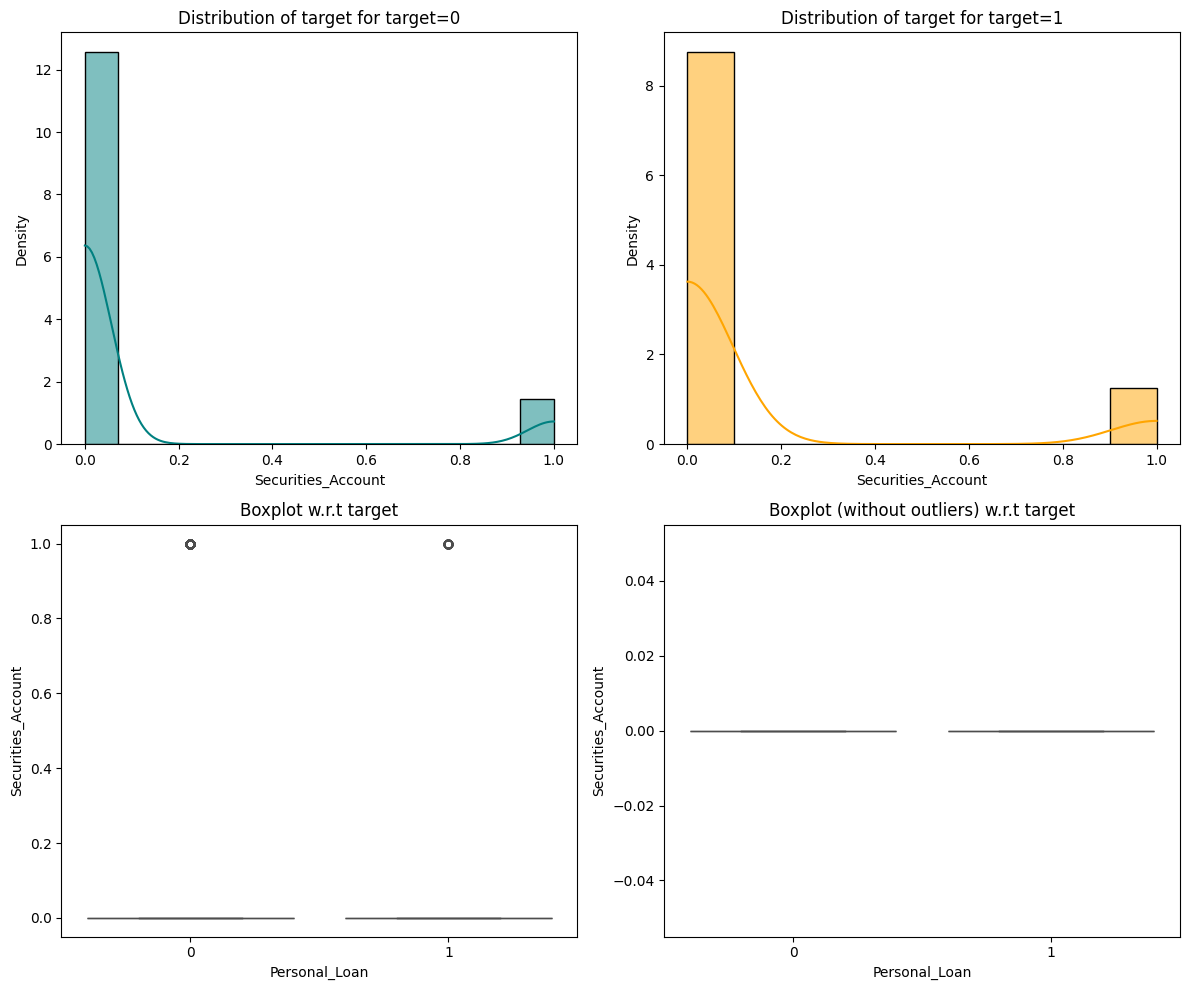

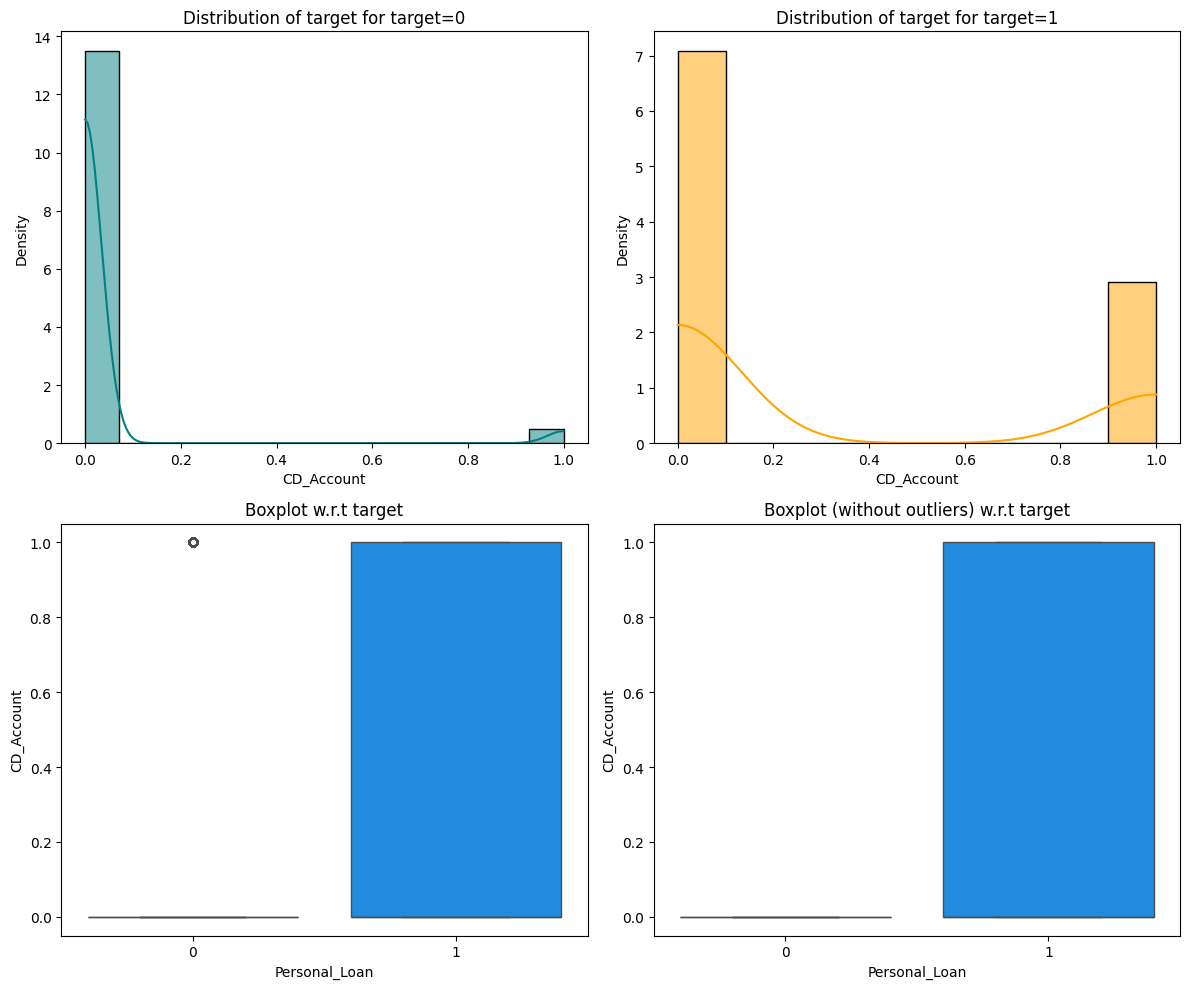

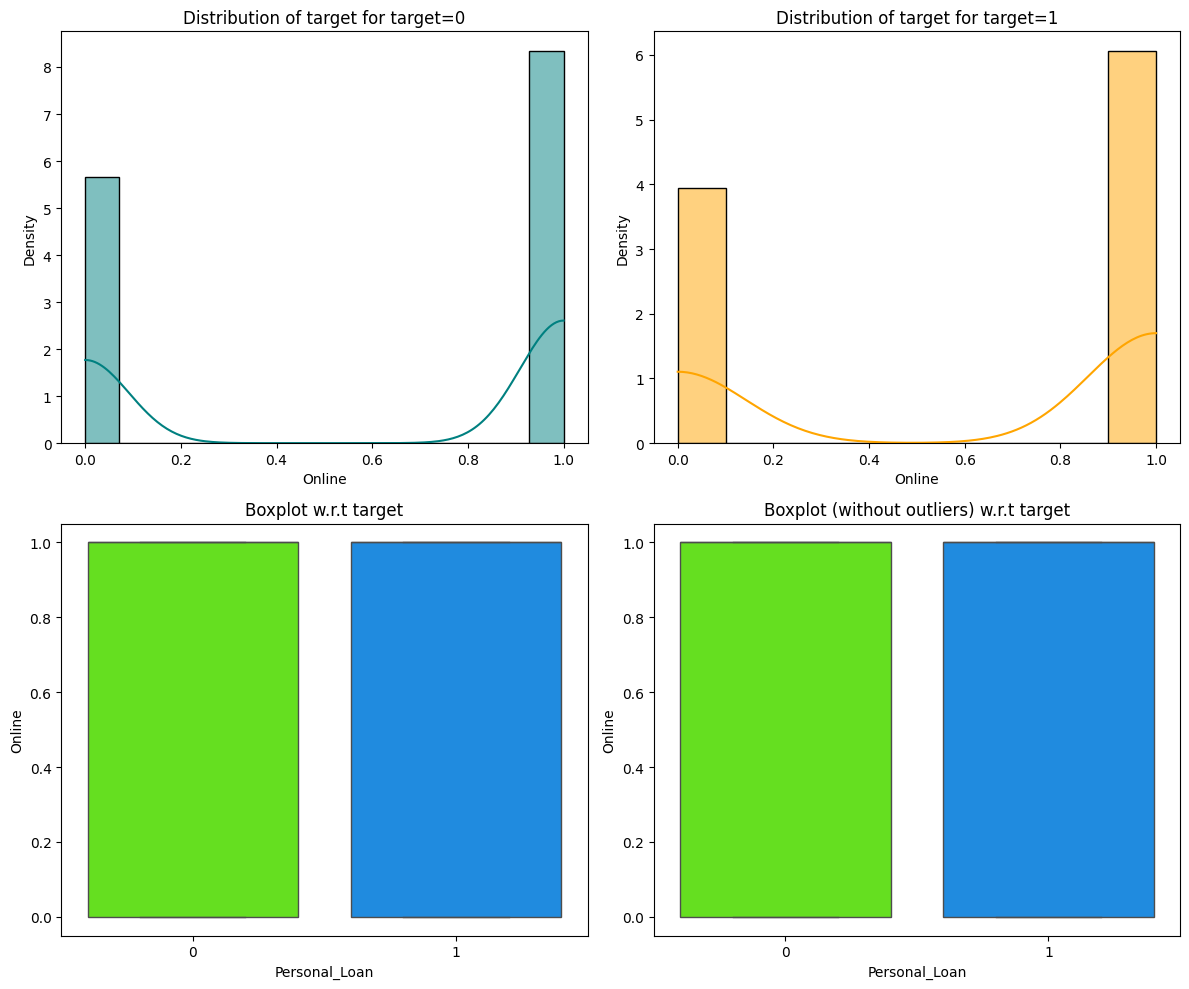

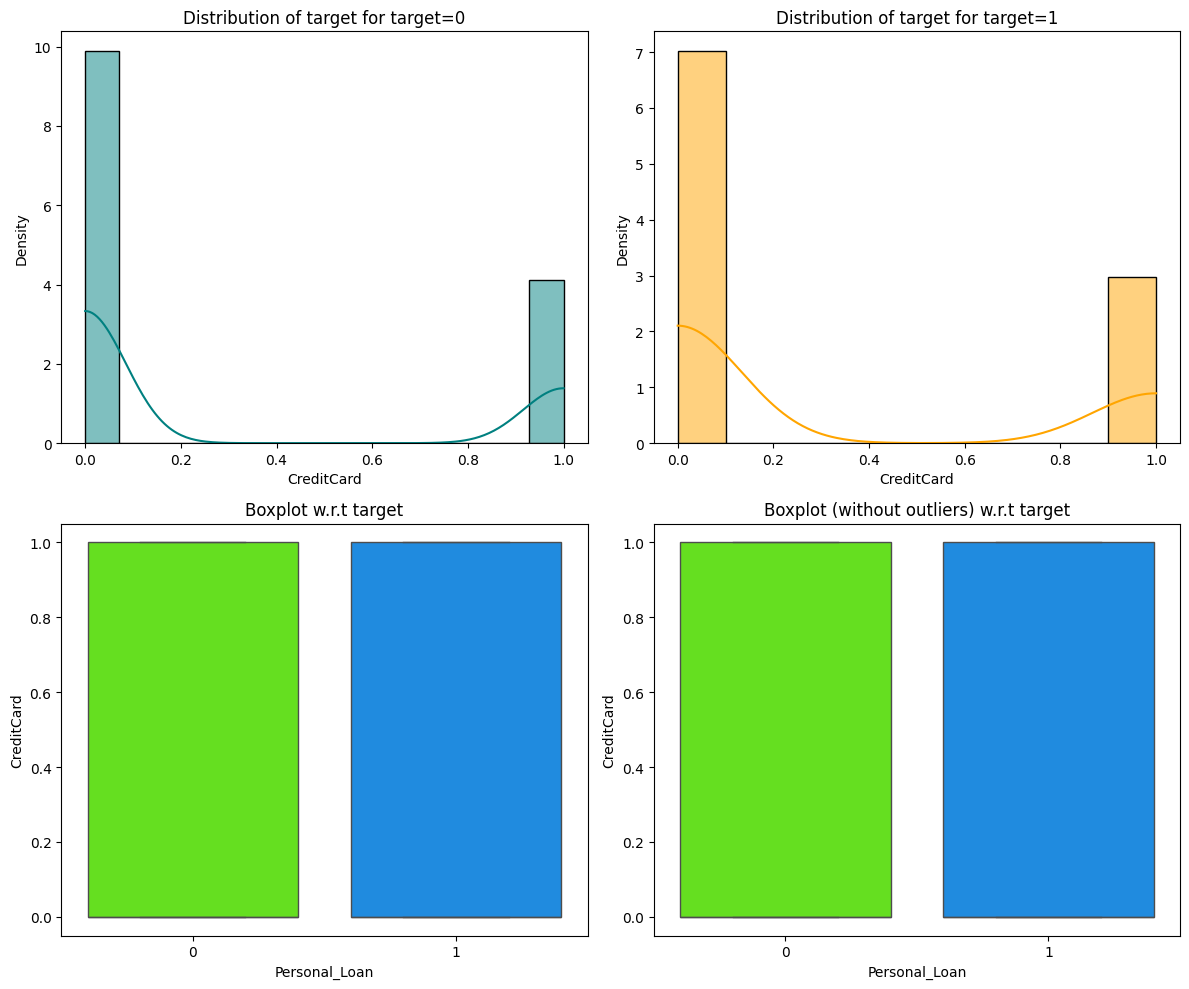

In [ ]:
valid_options = ["ZIPCode", "Personal_Loan"] ## Removing Zip code & target from loop
for column in data.columns:
    if column not in valid_options:
        distribution_plot_wrt_target(data,column, "Personal_Loan")

**Correlation Heat Map**

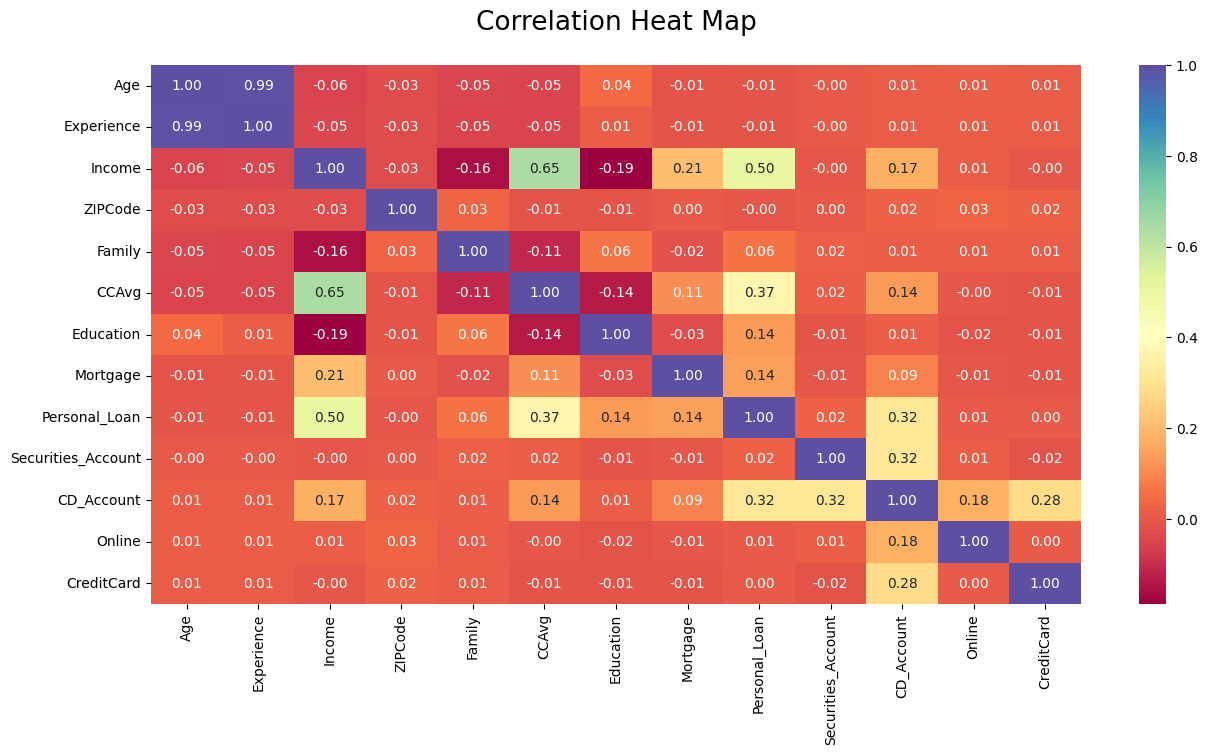

In [ ]:
correlation_heatmap(data)

**Key Observations from EDA**

• Age distribution is normal as previously mentioned and with respect to the target, we seem to have an equal number of customers with and without personal loans across the ages of 35 to 55

• Experience distribution is normal with the majority of customers accepting loans having a professional experience of 10 to 30 years

• Similarly we have an equal number of customers with professional experience of 10 to 30 years accepting personal loans.

• We observe a right skewness on the income column

• We also observe more customers with incomes of 100k and above accepting personal loans than those with lower incomes. Hence more likely to take a personal loan facility

• Customers with a family size of 2 and above are more likely to accept personal loans than those with a family size of less than 2

• We observe that customers with an Average Credit Card spending of 2k USD and above are more likely to accept personal loans than those with lower Average spending

• Customers with an education level Undergrad and above are most likely to accept personal loans

• Customers with Mortgage facilities are the most likely to accept personal loans than those without.

• We observe a weak correlation with the Securities account.

• Customers with CD Accounts tend to accept personal loan facilities more than customers without

• We observe an equal number of customers having or not having access to Internet banking accepting and rejecting personal loans

• We observe an equal number of customers with and without credit cards from other banks accepting and rejecting personal loans

• From the heat map, We observe a high correlation between Age and experience

• We observe a low but moderate correlation between mortgage and income

• We observe no correlation between zip code and target variable personal_loan

• Target variable personal loan seems to be greatly influenced by Mortgage, Education, CD account, and Credit Card spending


**Data Preparation**

**Data Preprocessing**

In [ ]:
# Copying the data to avoid touching original DF
df = data.copy()

#preview it
df.sample(10)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
351,28,4,155,92182,4,5.30000,2,0,1,0,0,1,0
1454,51,25,148,90024,1,1.00000,1,0,0,0,0,0,0
1695,30,6,184,91911,1,6.00000,1,0,0,0,0,1,0
1122,32,7,38,90041,1,1.00000,1,0,0,0,0,1,0
1561,46,20,73,93106,1,1.50000,2,128,0,0,0,1,0
1001,57,32,55,90717,4,2.10000,1,108,0,0,0,1,0
4656,47,21,38,91101,3,0.60000,2,0,0,1,0,0,0
3314,38,13,41,90073,4,1.70000,1,0,0,0,0,1,0
2217,48,24,162,91355,4,3.30000,2,446,1,0,1,1,0
3072,54,30,51,92821,2,3.20000,3,0,0,0,0,0,0


**Zip Code**

**Observations**

From EDA we observed no correlation between this column and the target variable. We will drop it.

In [ ]:
df.drop("ZIPCode",axis=1,inplace=True)

**Checking if we have negative values Experience Column and treating accordingly**

**Experience**

We observed from previous analysis that the Experience column has negative values. We need to treat accordingly

In [ ]:
# Checking how many negative values on the experience column
print("We have %2d negative values on the experience column" % df[df['Experience'] < 0].shape[0])

We have 52 negative values on the experience column


Replace negative Experience values with median

In [ ]:
#Convert all to Zeros
df['Experience'] = df['Experience'].apply(lambda x : 0 if x < 0 else x)
#Input with median
df['Experience'] = df['Experience'].replace(0,df['Experience'].median())

In [ ]:
# Checking how many negative values on the experience column after treatment
print("We now have %2d negative values on the experience column after treatment" % df[df['Experience'] < 0].shape[0])

We now have  0 negative values on the experience column after treatment


**Conclusion**

• We have dropped ZIPCode & ID columns from the data sets they have no real value

• Experience column was treated accordingly by removing negative values an imputing them with the median values



**Model Building**

**Defining functions to use later during model building and testing process**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf
#Function to compute the confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

#function to plut roc/auc curve

def plot_auc_roc(target,logistic_regression_model,predictors):
    logit_roc_auc_train = roc_auc_score(target, logistic_regression_model.predict_proba(predictors)[:, 1])
    fpr, tpr, thresholds = roc_curve(target, logistic_regression_model.predict_proba(predictors)[:, 1])
    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
    plt.plot([0, 1], [0, 1], "r--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc="lower right")
    plt.show()

**Model evaluation criterion**

**The model can make wrong predictions as:**

Predicting a customer is not going to accept (0) personal loan but in reality, the customer will accept - Opportunity Loss (FN)

Predicting a customer is going to accept (1) personal loan but in reality, the customer will not accept - Loss of marketing resources (FP)

**Which Loss is greater?**

Opportunity loss will be the greater loss as the bank will lose revenue and possibly the customer

**How to reduce this loss i.e. need to reduce False Negatives?**

The bank needs to reduce false negatives, this can be done by maximizing the Recall.


**Model Bulding - Logistic Regression**

In [ ]:
# Defining target and independent variables
X=df.drop("Personal_Loan",axis=1);
y=df["Personal_Loan"]

In [ ]:
#Solitting into test and train data sets respectively
X_Train, X_Test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
#Defining the logistic regression model
logistic_regression_model = LogisticRegression(solver="newton-cg",random_state=1);

In [ ]:
logistic_regression_model.fit(X_Train,y_train);

**Finding the coefficients**

In [ ]:
log_odds = logistic_regression_model.coef_[0]
pd.DataFrame(log_odds, X_Train.columns, columns=["coef"]).T

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
coef,0.03170,-0.02841,0.05263,0.71712,0.16723,1.65474,0.00075,-0.84127,3.25905,-0.54117,-0.93544


**Coefficient interpretations**

• Coefficients of Age, Family Size, CCAvg, Education, and Mortgage are positive, an increase in these variables will lead to an increase in the chances of a customer accepting a personal loan.

• Coefficients of Experience, Securities_Account, Online, CreditCard(from other banks) are negative, an increase in these will lead to a decrease in the chances of a customer accepting a personal loan



**Converting coefficients to odds**

In [ ]:
# converting coefficients to odds
odds = np.exp(logistic_regression_model.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(logistic_regression_model.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_Train.columns).T

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
Odds,1.03220,0.97199,1.05403,2.04853,1.18203,5.23174,1.00075,0.43116,26.02483,0.58207,0.39241
Change_odd%,3.22036,-2.80142,5.40346,104.85319,18.20294,423.17401,0.07540,-56.88379,2502.48300,-41.79324,-60.75874


**Coefficient interpretations**

• Age: Holding all other features constant a unit change in Age will increase the odds of a customer accepting a personal loan by 1.03 times or a 3.2% increase in the odds.

• Experience: Holding all other features constant a unit change in Professional Experience will decrease the odds of a customer accepting a personal loan by 0.97 times or a -2.83% decrease in the odds.

• Income: Holding all other features constant a unit change in Income will increase the odds of a customer accepting a personal loan by 1.05 times or a 5.4% increase in the odds.

• Family: Holding all other features constant a unit change in Family Size will increase the odds of a customer accepting a personal loan by 2 times or a 105% increase in the odds.

• CCAvg: Holding all other features constant a unit change in CCAvg Size will increase the odds of a customer accepting a personal loan by 1.18 times or an 18% increase in the odds.

• Education: Holding all other features constant a unit change in Education will increase the odds of a customer accepting a personal loan by 5.2 times or a 423% increase in the odds.

• Mortgage: Holding all other features constant a unit change in Mortgage will increase the odds of a customer accepting a personal loan by 1.0 times or a 0.07495% increase in the odds.

• Securities_Account: Holding all other features constant a unit change in Securities_Account will decrease the odds of a customer accepting a personal loan by 0.43 times or a 56% decrease in the odds.

• CD_Account: Holding all other features constant a unit change in CD_Account will increase the odds of a customer accepting a personal loan by 26 times or a 2502% increase in the odds.

• Online: Holding all other features constant a unit change in Online will decrease the odds of a customer accepting a personal loan by 0.58 times or a 41% decrease in the odds.



**Model Performance on Training Set**

**Creating confusion matrix**

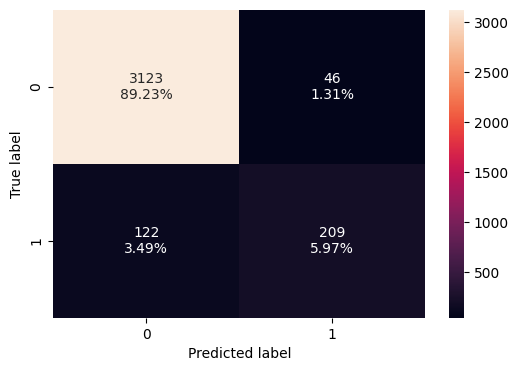

In [ ]:
confusion_matrix_sklearn_with_threshold(logistic_regression_model, X_Train, y_train)

**Checking the Model Performance on Training Set with default threshold of 0.5**

In [ ]:
default_model_performance = model_performance_classification_sklearn_with_threshold(logistic_regression_model,X_Train,y_train)
default_model_performance

,Accuracy,Recall,Precision,F1
0,0.95200,0.63142,0.81961,0.71331


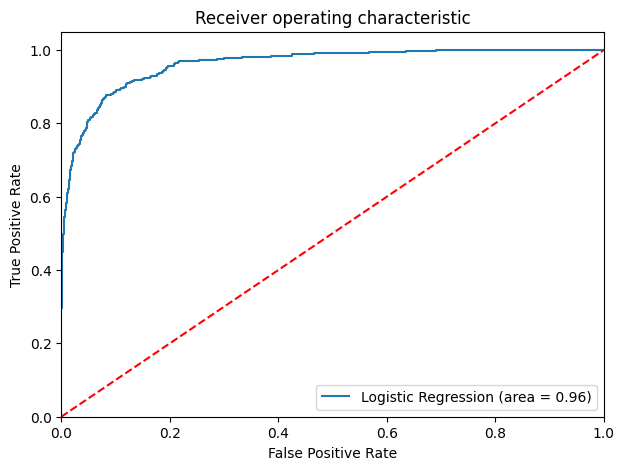

In [ ]:
plot_auc_roc(y_train,logistic_regression_model,X_Train)

**Conclusions**

•	The model is performing well on the training set with an Area Under the Curve(AUC) of 0.96.

•	The recall is also low at 63% but we can see if this can be improved further


**Logistic Model Performance Improvement**

Let us see if the recall can be improved by applying optimal thresholds

**Optimal threshold using AUC-ROC curve**

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, logistic_regression_model.predict_proba(X_Train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.1310149557258679


**Checking Model Performance using Optimum AUC/ROC threshold on Training set**

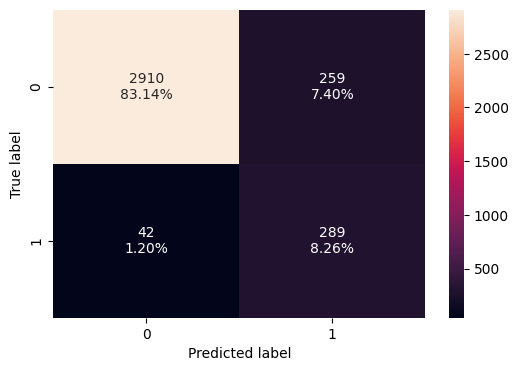

In [ ]:
#Confusion Matrix
confusion_matrix_sklearn_with_threshold(
    logistic_regression_model, X_Train, y_train, threshold=optimal_threshold_auc_roc
)

F1, Recall, Precision, Accuracy with optimum threshold (AUC/ROC) - Training Set

In [ ]:
model_performance_aoc_ruc=model_performance_classification_sklearn_with_threshold(logistic_regression_model,X_Train,y_train,optimal_threshold_auc_roc)
model_performance_aoc_ruc

,Accuracy,Recall,Precision,F1
0,0.91400,0.87311,0.52737,0.65757


**Conclusions**

• Precision drops to 0.52 on the training set after applying the optimum threshold from AUC/ROC

• Recall improves to 87% after applying the optimum threshold from AUC/ROC



**Optimal threshold using Precision/Recall curve**

**We will try to obtain the optimum threshold that will maximize F1 score**

In [ ]:
##Obtain predictions
y_scores = logistic_regression_model.predict_proba(X_Train)[:, 1]
prec, rec, thresholds = precision_recall_curve(y_train, y_scores,)

# find the threshold that maximizes F1 score
f1_scores = 2 * prec * rec / (prec + rec)
optimal_idx = np.argmax(f1_scores)
optimal_threshold_f1 = thresholds[optimal_idx]
print("Optimum Threshold is >> " , optimal_threshold_f1)

Optimum Threshold is >>  0.3720465880846765


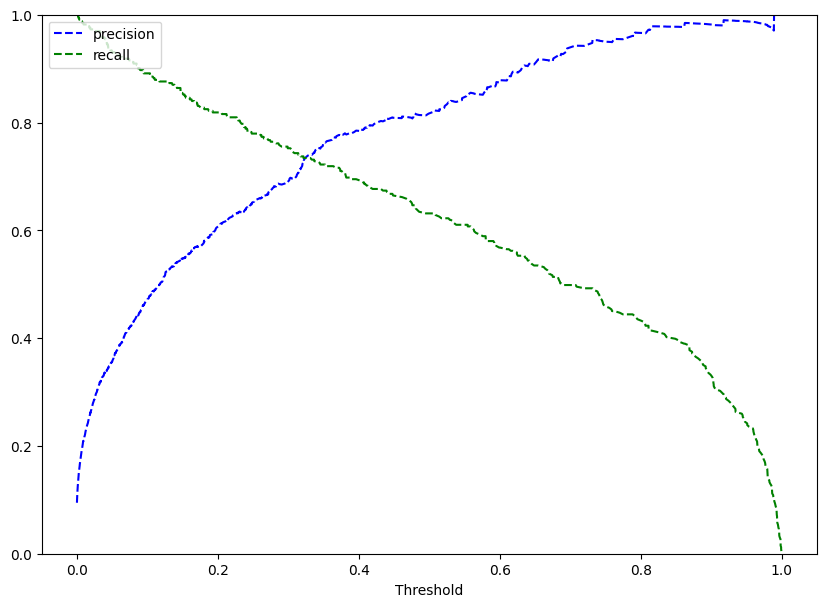

In [ ]:
#Plot the above
def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, thresholds)
plt.show()

At threshold around 0.3720465880846765 we will get equal precision and recall

**Checking Model Performance using Optimum Precision/Recall threshold above on the Training Set**

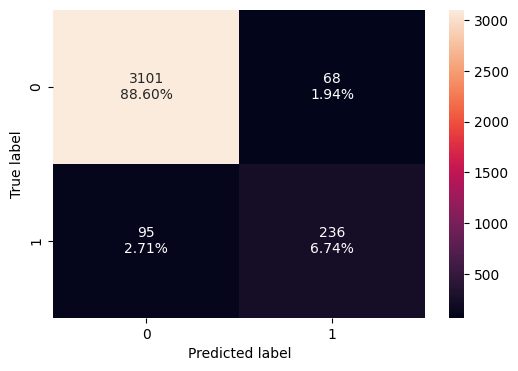

In [ ]:
#Confusion Matrix
confusion_matrix_sklearn_with_threshold(
    logistic_regression_model, X_Train, y_train, threshold=optimal_threshold_f1
)

**F1, Recall, Precision, Accuracy with optimum precision/recall - Training Set**

In [ ]:
model_performance_recal_pre_curve=model_performance_classification_sklearn_with_threshold(logistic_regression_model,X_Train,y_train,optimal_threshold_f1)
model_performance_recal_pre_curve

,Accuracy,Recall,Precision,F1
0,0.95343,0.71299,0.77632,0.74331


Precision improves to 77% while recall drops slightly to 71%

**Model Performance on Testing Set**

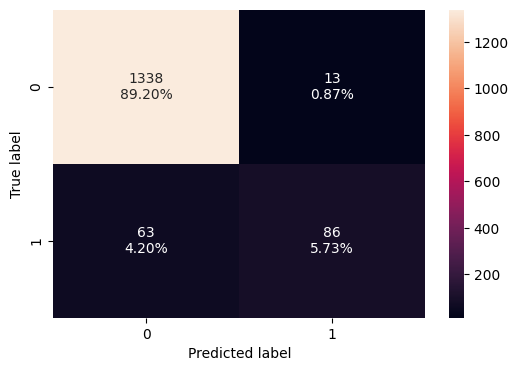

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(logistic_regression_model, X_Test, y_test)

**Obtain performance using default threshold of 0.5**

In [ ]:
test_performance_default = model_performance_classification_sklearn_with_threshold(
    logistic_regression_model, X_Test, y_test
)

test_performance_default

,Accuracy,Recall,Precision,F1
0,0.94933,0.57718,0.86869,0.69355


•	Model with default threshold performs poorly with a recall of 58%

•	F1 Score at 69 % and high precision of 87%


**Testing Set ROC-AUC**

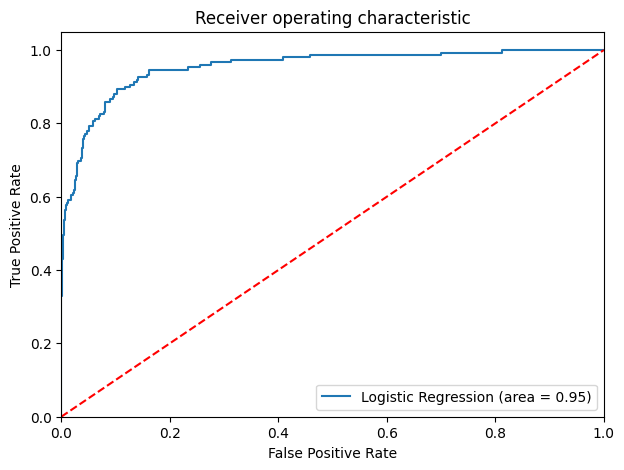

In [ ]:
plot_auc_roc(y_test,logistic_regression_model,X_Test)

**Obtain optimum threshold from ROC/AUC and test it on training set**

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, logistic_regression_model.predict_proba(X_Test)[:, 1])

optimal_idx_test = np.argmax(tpr_test - fpr_test)
optimal_threshold_auc_roc_test = thresholds[optimal_idx_test]

print("Optimum Threshold AUC/ROC Test >> " , optimal_threshold_auc_roc_test)

Optimum Threshold AUC/ROC Test >>  6.748929464798212e-05


**Checking Model Performance using Optimum AUC/ROC threshold on Testing set**

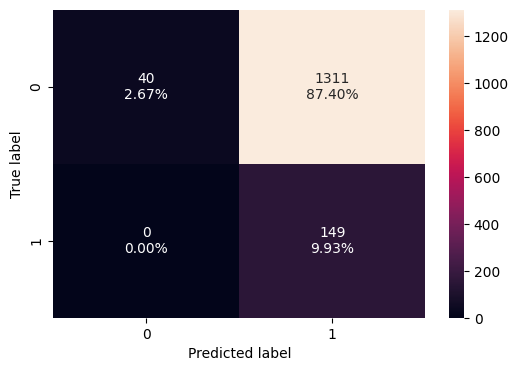

In [ ]:
#Confusion Matrix
confusion_matrix_sklearn_with_threshold(
    logistic_regression_model, X_Test, y_test, threshold=optimal_threshold_auc_roc_test
)

In [ ]:
model_performance_aoc_ruc_test=model_performance_classification_sklearn_with_threshold(logistic_regression_model,X_Test,y_test,optimal_threshold_auc_roc_test)
model_performance_aoc_ruc_test
# model_performance_recal_pre_curve=model_performance_classification_sklearn_with_threshold(logistic_regression_model,X_Train,y_train,optimal_threshold_f1)
# model_performance_recal_pre_curve

,Accuracy,Recall,Precision,F1
0,0.12600,1.00000,0.10205,0.18521


**Conclusions**

•	Model recall score gives **100%** on testing but recall is low using optimum threshold for ROC/AUC

•	Precision/F1 score are low at **10% & 18%** respectively



**Optimal threshold using Precision Recall curve on testing Set**

In [ ]:
y_scores_test = logistic_regression_model.predict_proba(X_Test)[:, 1]
prec_test, rec_test, thresholds_f1_test = precision_recall_curve(y_test, y_scores_test)

# find the threshold that maximizes F1 score
f1_scores_test = 2 * prec_test * rec_test / (prec_test + rec_test)
optimal_idx_f1_test = np.argmax(f1_scores_test)
optimal_threshold_f1_test = thresholds_f1_test[optimal_idx_f1_test]
print("Optimum Threshold  Precision/Recall Curve >> " , optimal_threshold_f1_test)

Optimum Threshold  Precision/Recall Curve >>  0.24055436898030674


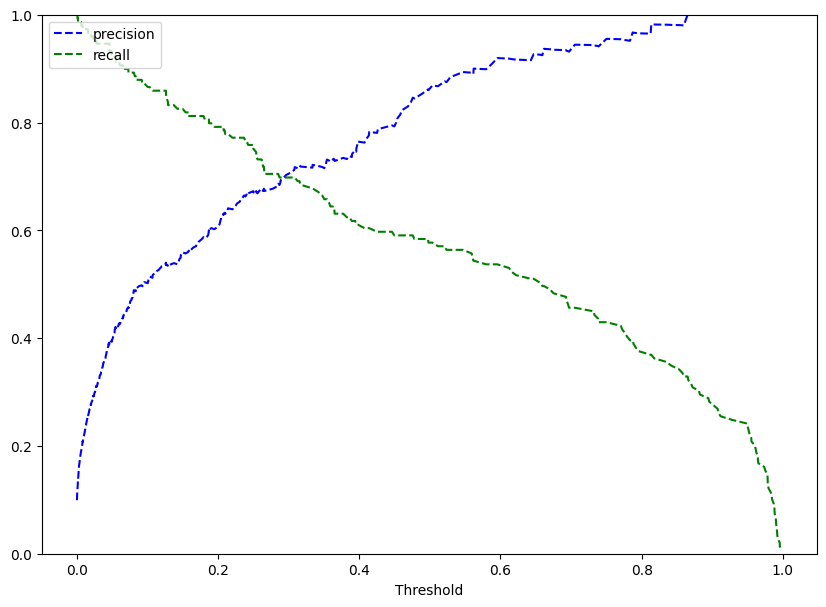

In [ ]:
plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec_test, rec_test, thresholds_f1_test)
plt.show()

**Checking Model Performance using Optimum Precision/Recall Optimum threshold on Testing set**

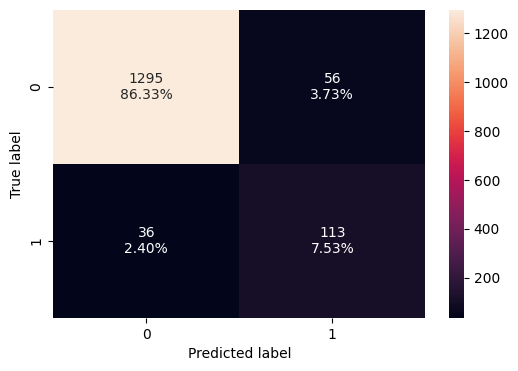

In [ ]:
#Confusion Matrix
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(logistic_regression_model, X_Test, y_test,optimal_threshold_f1_test)

In [ ]:
model_performance_f1_test=model_performance_classification_sklearn_with_threshold(logistic_regression_model,X_Test,y_test,optimal_threshold_f1_test)
model_performance_f1_test

,Accuracy,Recall,Precision,F1
0,0.93867,0.75839,0.66864,0.71069


• Recall & F1 score is relatively good after applying an optimum threshold of 0.24 on the testing set using precision/recall curve

• Precision score at 66%



**Logistic Regression Model Performance Summary**

In [ ]:
# training performance summary

models_train_comparision_df = pd.concat(
    [
        default_model_performance.T,
        model_performance_aoc_ruc.T,
        model_performance_recal_pre_curve.T,
    ],
    axis=1,
)
models_train_comparision_df.columns = [
    "Logistic Regression(Default)",
    "Logistic Regression-0.13 Threshold(AUC/ROC)",
    "Logistic Regression-0.37 Threshold (Precision/Recall Curve)",
]

print("Training performance summary:")
models_train_comparision_df

Training performance summary:


,Logistic Regression(Default),Logistic Regression-0.13 Threshold(AUC/ROC),Logistic Regression-0.37 Threshold (Precision/Recall Curve)
Accuracy,0.95200,0.91400,0.95343
Recall,0.63142,0.87311,0.71299
Precision,0.81961,0.52737,0.77632
F1,0.71331,0.65757,0.74331


In [ ]:
# Testing performance summary

models_test_comparision_df = pd.concat(
    [
        test_performance_default.T,
        model_performance_aoc_ruc_test.T,
        model_performance_f1_test.T,
    ],
    axis=1,
)
models_test_comparision_df.columns = [
    "Logistic Regression(Default)",
    "Logistic Regression-0.00 Threshold(AUC/ROC)",
    "Logistic Regression-0.24 Threshold(Precision/Recall Curve)",
]

print("Test performance summary:")
models_test_comparision_df

Test performance summary:


,Logistic Regression(Default),Logistic Regression-0.00 Threshold(AUC/ROC),Logistic Regression-0.24 Threshold(Precision/Recall Curve)
Accuracy,0.94933,0.12600,0.93867
Recall,0.57718,1.00000,0.75839
Precision,0.86869,0.10205,0.66864
F1,0.69355,0.18521,0.71069


**Perfromance Comments on Training Set**

•	We observe the default model has a recall of 63%, a precision of 81%, and an F1 score of 71% on the training set

•	We observe that after applying the optimum AUC/ROC threshold of 0.13 the recall is 87%, the precision is 52% and the F1 score is 65% on the training set

•	We observe that after applying the optimum threshold of 0.37 from the Precision/Recall curve, the recall is 71%, precision is 77% with an F1 score of 74% on the training set

•	The optimized model with a 0.37 threshold will give a better overall performance since it has a balance score of recall, precision, and F1 score all ranging between 70 to 74% on the training set




**Perfromance Comments on Testing Set**

• We observe the default model has a recall of 58%, a precision of 87%, and an F1 score of 69% on the testing set

• We observe that after applying the optimum AUC/ROC threshold of 6.181955535654002e-05, i.e. 0.00, the model performs poorly, with the recall of 100%, precision = 10%, and an F1 score of 18% on the testing set.

• We observe that after applying the optimum threshold of 0.24 from the Precision/Recall curve, the recall changes to 76% the precision is 67% with an F1 score of 71% on the testing set

• The optimized model with a 0.37 threshold will give a balanced performance since it has a balance score of precision, F1 score recall ranging between 67% to 76% on the training set




**Model Building - Decision Tree**

In [ ]:
decision_tree_model = DecisionTreeClassifier(criterion="gini", random_state=1)
decision_tree_model.fit(X_Train, y_train)

DecisionTreeClassifier(random_state=1)

**Check Decision Tree model performance on training set**

In [ ]:
decision_tree_performance_default = model_performance_classification_sklearn(decision_tree_model, X_Train, y_train)
decision_tree_performance_default

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


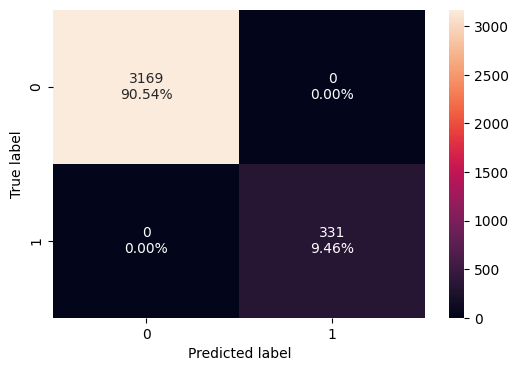

In [ ]:
#Confusion Matrix
confusion_matrix_sklearn(decision_tree_model, X_Train, y_train)

**Checking Decision Tree model performance on test set**

In [ ]:
decision_tree_performance_test = model_performance_classification_sklearn(decision_tree_model, X_Test, y_test)
decision_tree_performance_test

,Accuracy,Recall,Precision,F1
0,0.98000,0.88591,0.91034,0.89796


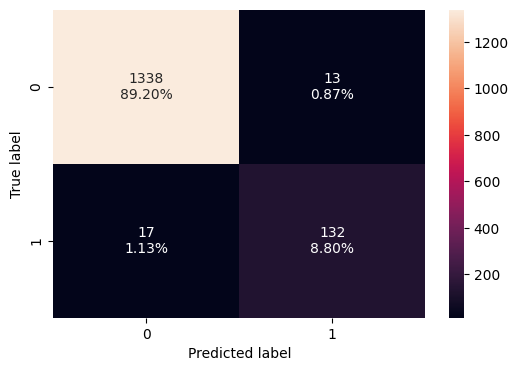

In [ ]:
#Confusion Matrix
confusion_matrix_sklearn(decision_tree_model, X_Test, y_test)

**Decision Tree Visualization**

In [ ]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


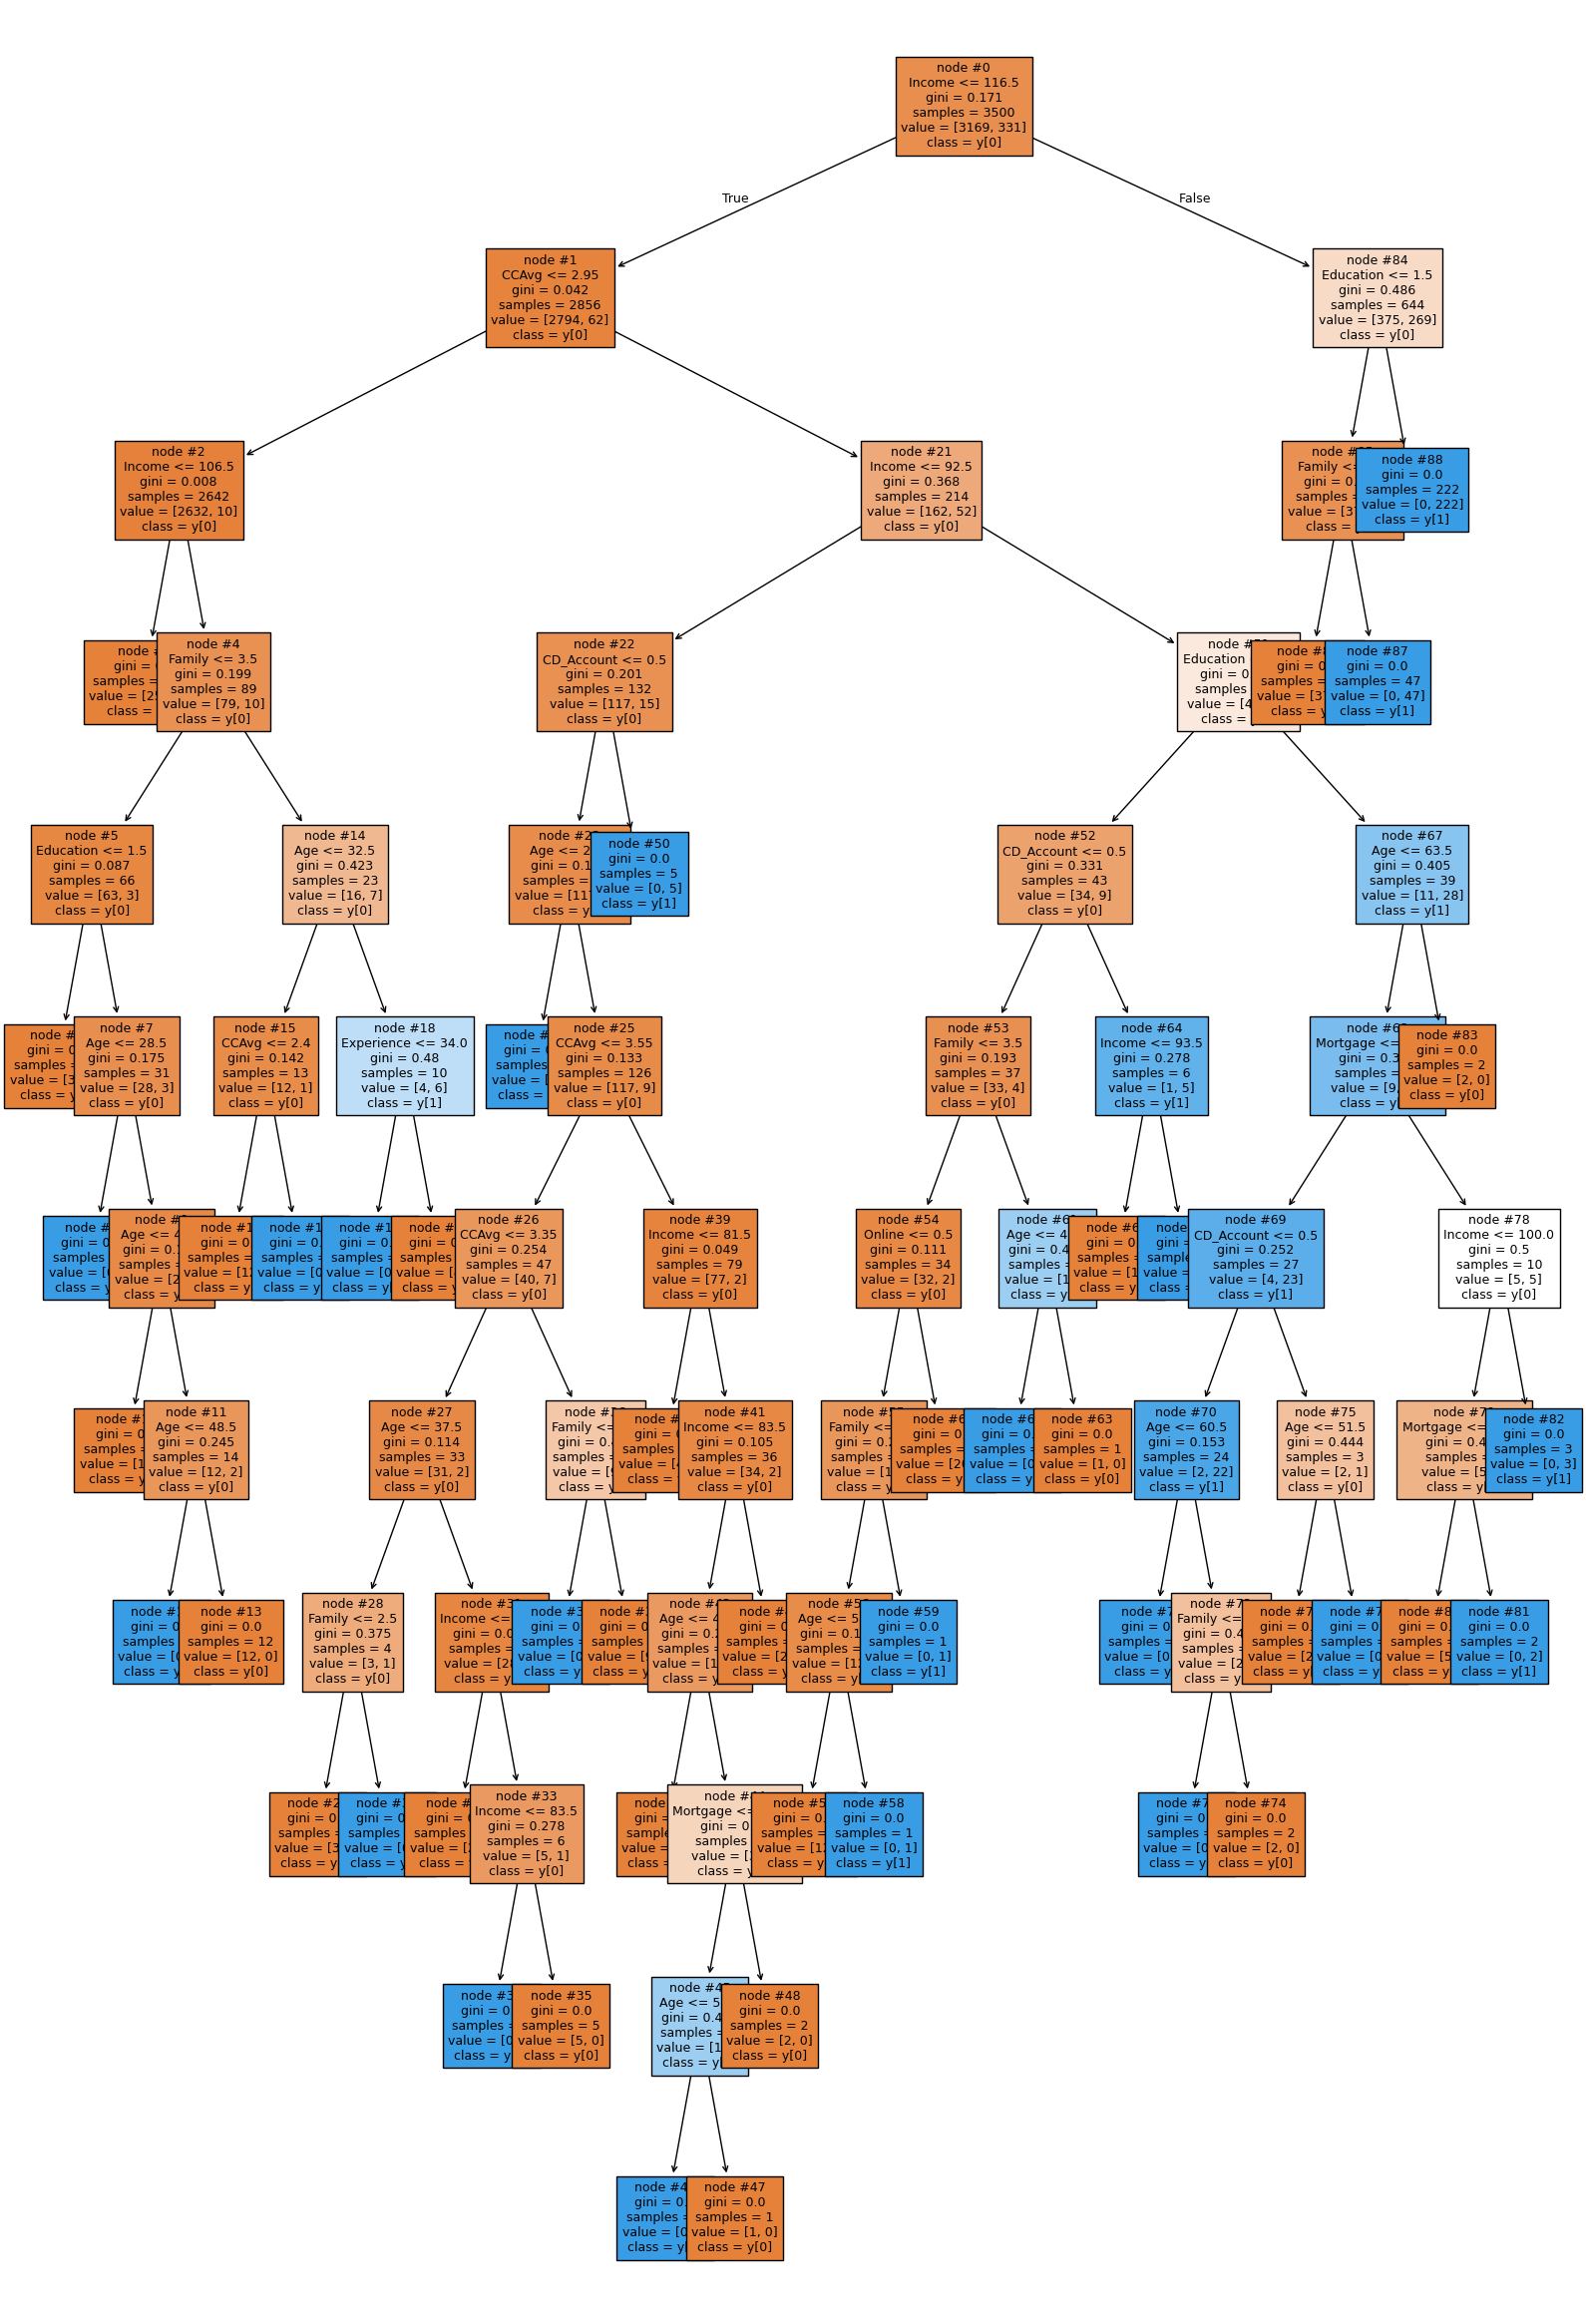

In [ ]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    decision_tree_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [ ]:
print(tree.export_text(decision_tree_model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |--- weights: [35.00, 0.00] class: 0
|   |   |   |   |--- Education >  1.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- Age <= 41.50
|   |   |   |   |   |   |   |--- weights: [16.00, 0.00] class: 0
|   |   |   |   |   |   |--- Age >  41.50
|   |   |   |   |   |   |   |--- Age <= 48.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |--- Age >  48.50
|   |   |   |   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Age <= 32.50
|   |   |   |   |   |--- CCAvg <= 2.40
|   |   |   |   |   |   |--- weights: [12.00, 0.00] class:

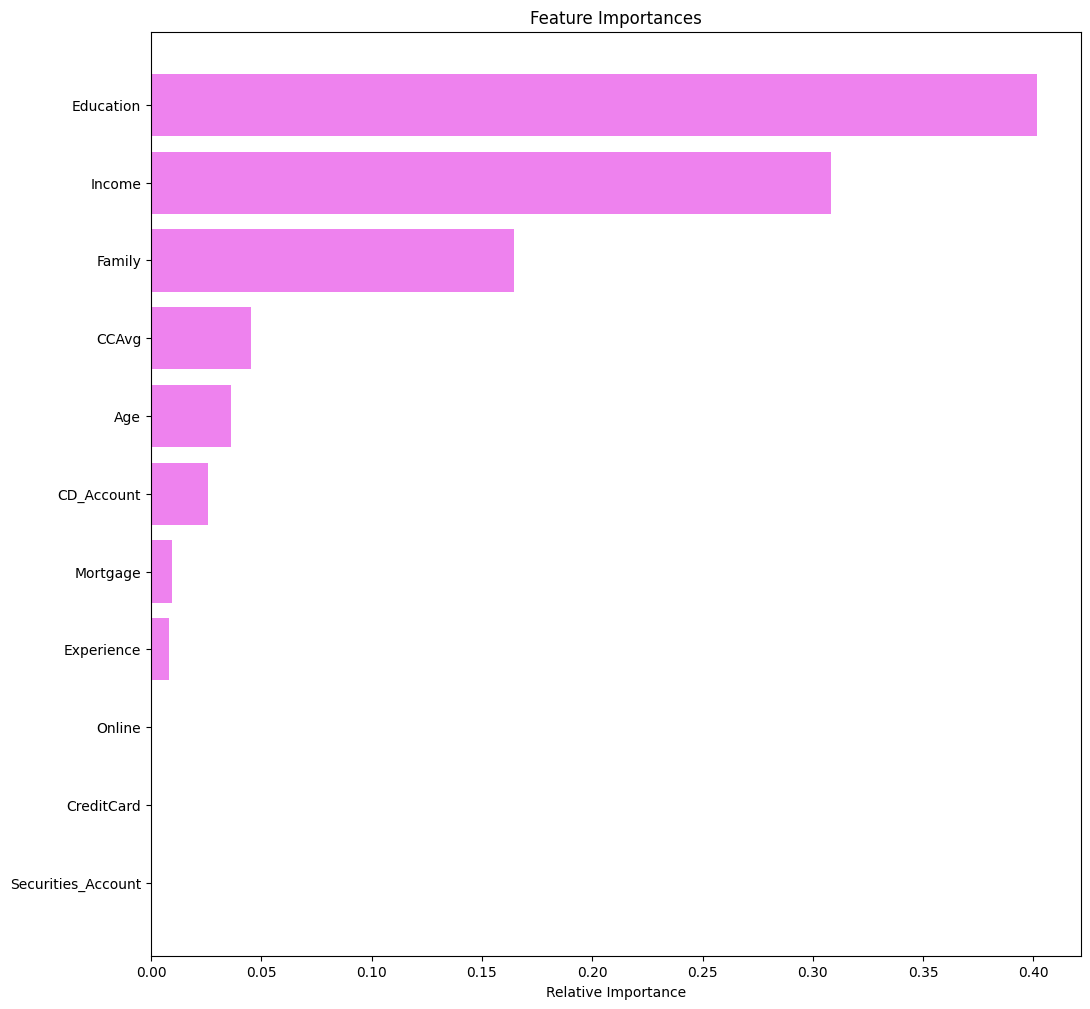

In [ ]:
importances = decision_tree_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Model Performance observations**

•	Education, Family, CCAvg, and Age are the top 4 important features.

•	The default decision tree model overfits the data and hence gives the highest score of 1 on recall, accuracy, F1, and precision

•	Likewise for the testing set, the performance scores are high due to the overfitting scenario


**Model performance evaluation and improvement**

**Pre-pruning**

**Using GridSearch for Hyperparameter tuning of our tree model**

In [ ]:
estimator = DecisionTreeClassifier(random_state=1)

# Setting parameters to use for prepruning
parameters = {
    "max_depth": [np.arange(1, 11, 2),None],
    "criterion": ["gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}
# select type of scoring. We chose precision
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_Train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_Train, y_train)

DecisionTreeClassifier(min_impurity_decrease=0.0001, random_state=1)

**Checking performance on training set**

In [ ]:
decision_tree_train_tuned = model_performance_classification_sklearn(
    estimator, X_Train, y_train
)
decision_tree_train_tuned

,Accuracy,Recall,Precision,F1
0,0.99743,0.97281,1.00000,0.98622


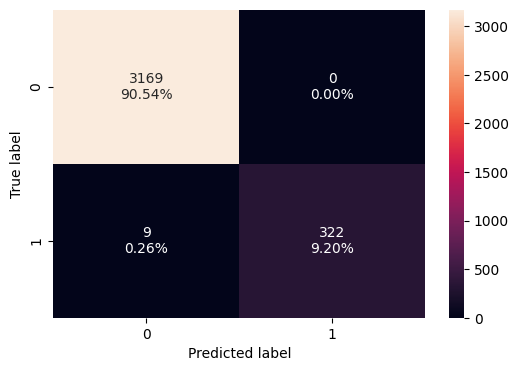

In [ ]:
confusion_matrix_sklearn(estimator, X_Train, y_train)

**Checking performance on testing set**

In [ ]:
decision_tree_test_preprunned = model_performance_classification_sklearn(
    estimator, X_Test, y_test
)
decision_tree_test_preprunned

,Accuracy,Recall,Precision,F1
0,0.98133,0.87248,0.93525,0.90278


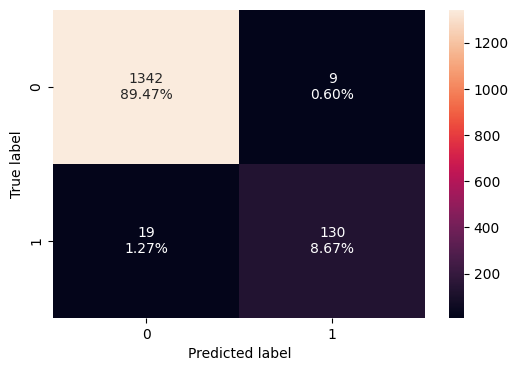

In [ ]:
confusion_matrix_sklearn(estimator, X_Test, y_test)

The model performs well on the testing set with a precision of 0.93 , recall of 0.87 and F1 score of 0.9

**Visualizing the tree after Pre-prunning**

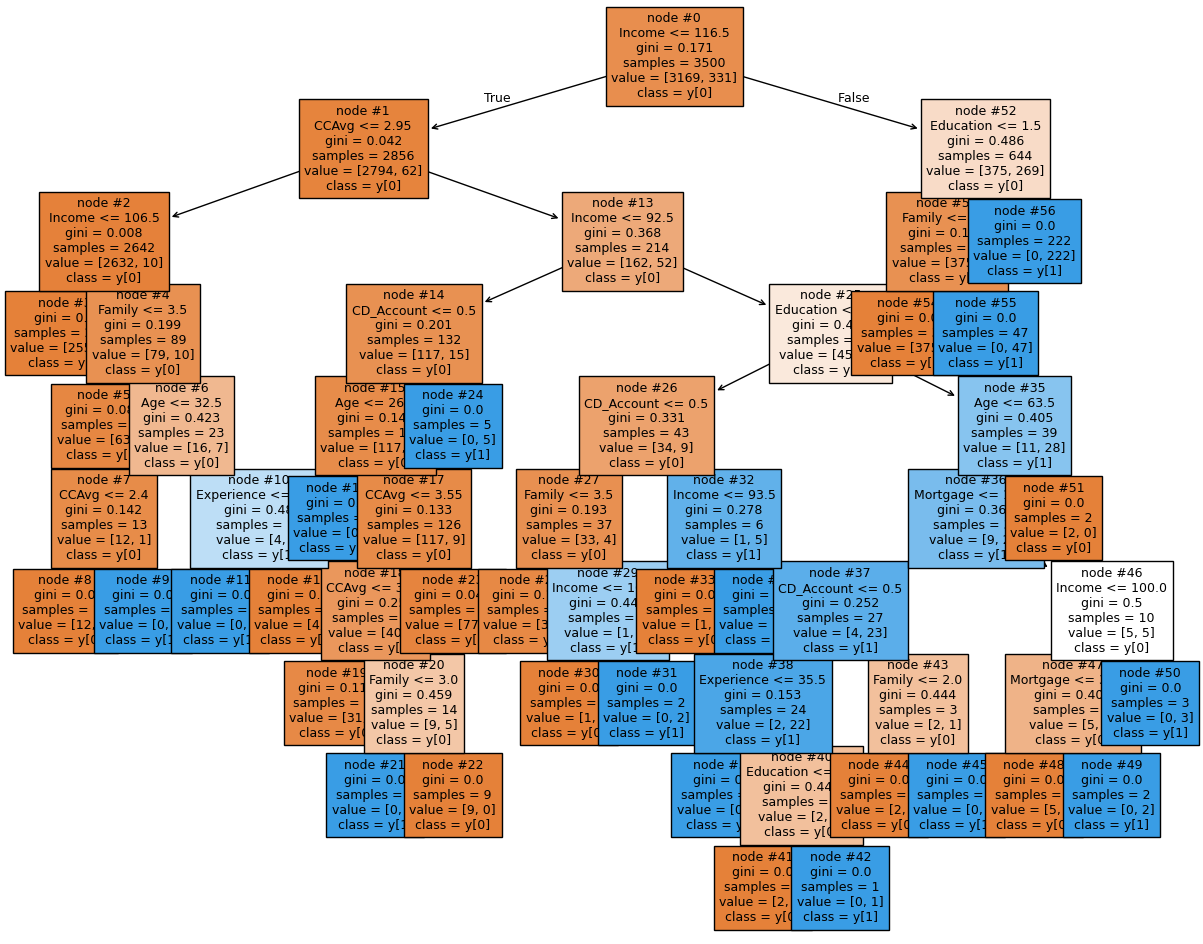

In [ ]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

We observe a simpler tree after pre-pruning

**Post-pruning - Cost Complexity Pruning**

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_Train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00000
1,0.00022,0.00111
2,0.00027,0.00219
3,0.00036,0.00326
4,0.00038,0.00364
5,0.00038,0.00403
6,0.00038,0.00441
7,0.00041,0.00604
8,0.00048,0.00652
9,0.00053,0.00705


**Precision vs alpha analysis on training and testing sets**

In [ ]:
#Obtain clfs
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_Train, y_train)
    clfs.append(clf)

In [ ]:
# Training Set
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_Train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
# Testing Set
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_Test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

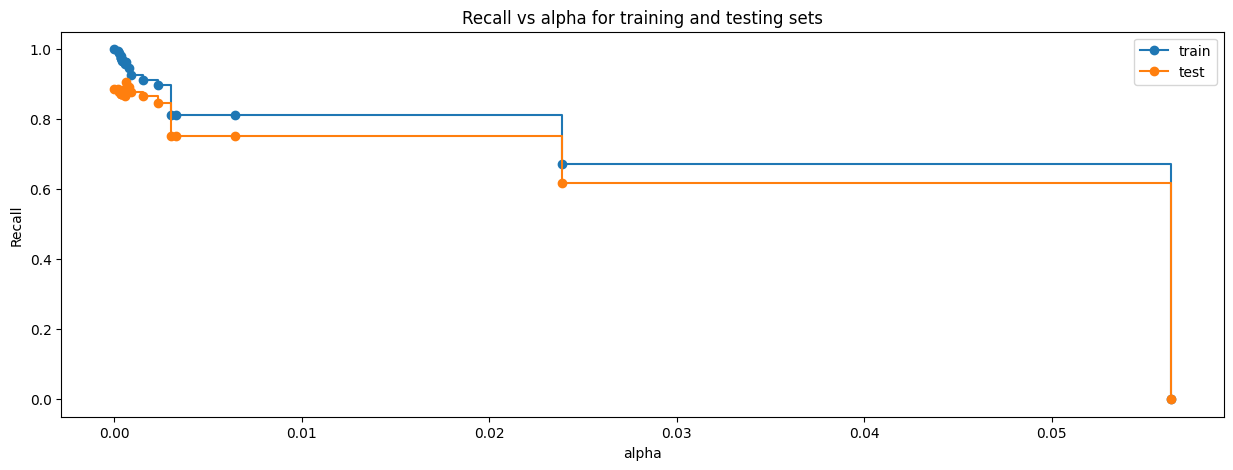

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
#Obtaining the best model
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006414326414326415, random_state=1)


**Checking model performance on training set**

In [ ]:
tree_postprun_performance_train = model_performance_classification_sklearn(best_model, X_Train, y_train)
tree_postprun_performance_train

,Accuracy,Recall,Precision,F1
0,0.99314,0.96375,0.96375,0.96375


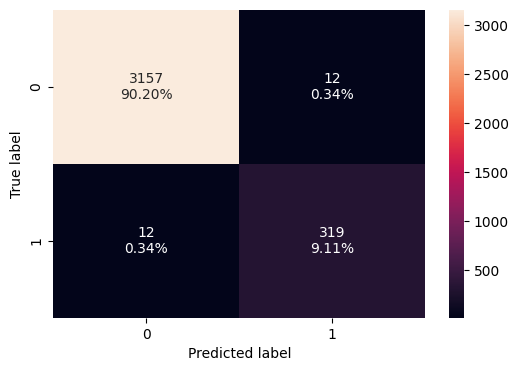

In [ ]:
confusion_matrix_sklearn(best_model,  X_Train, y_train)

**Checking model performance on testing set**

In [ ]:
tree_postprun_performance_test = model_performance_classification_sklearn(best_model, X_Test, y_test)
tree_postprun_performance_test

,Accuracy,Recall,Precision,F1
0,0.98400,0.90604,0.93103,0.91837


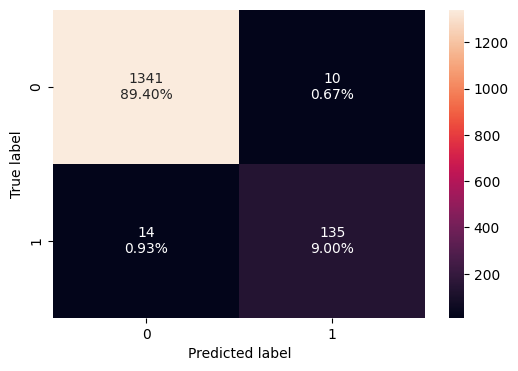

In [ ]:
confusion_matrix_sklearn(best_model,  X_Test, y_test)

**Visualizing the Decision Tree after Post Pruning**

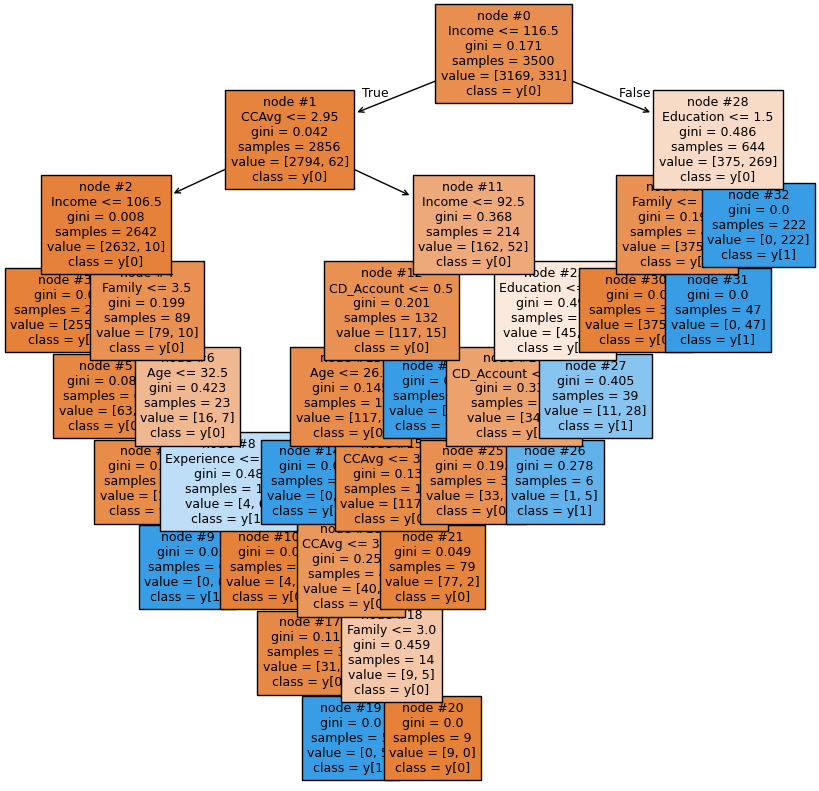

In [ ]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [ ]:
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- weights: [63.00, 3.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Age <= 32.50
|   |   |   |   |   |--- weights: [12.00, 1.00] class: 0
|   |   |   |   |--- Age >  32.50
|   |   |   |   |   |--- Experience <= 34.00
|   |   |   |   |   |   |--- weights: [0.00, 6.00] class: 1
|   |   |   |   |   |--- Experience >  34.00
|   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |   |--- CCAvg <= 3.35
|   |   |   |   |   |   |   |--- weights: [31.00, 2.00] class: 0
|   |   |   |   |   |   |--- CCAv

**Checking importances after post pruning**

In [ ]:
# Checking importances
print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_Train.columns
    ).sort_values(by="Imp", ascending=False)
)

                       Imp
Education          0.42949
Income             0.31901
Family             0.16485
CCAvg              0.04519
CD_Account         0.02430
Age                0.00859
Experience         0.00858
Mortgage           0.00000
Securities_Account 0.00000
Online             0.00000
CreditCard         0.00000


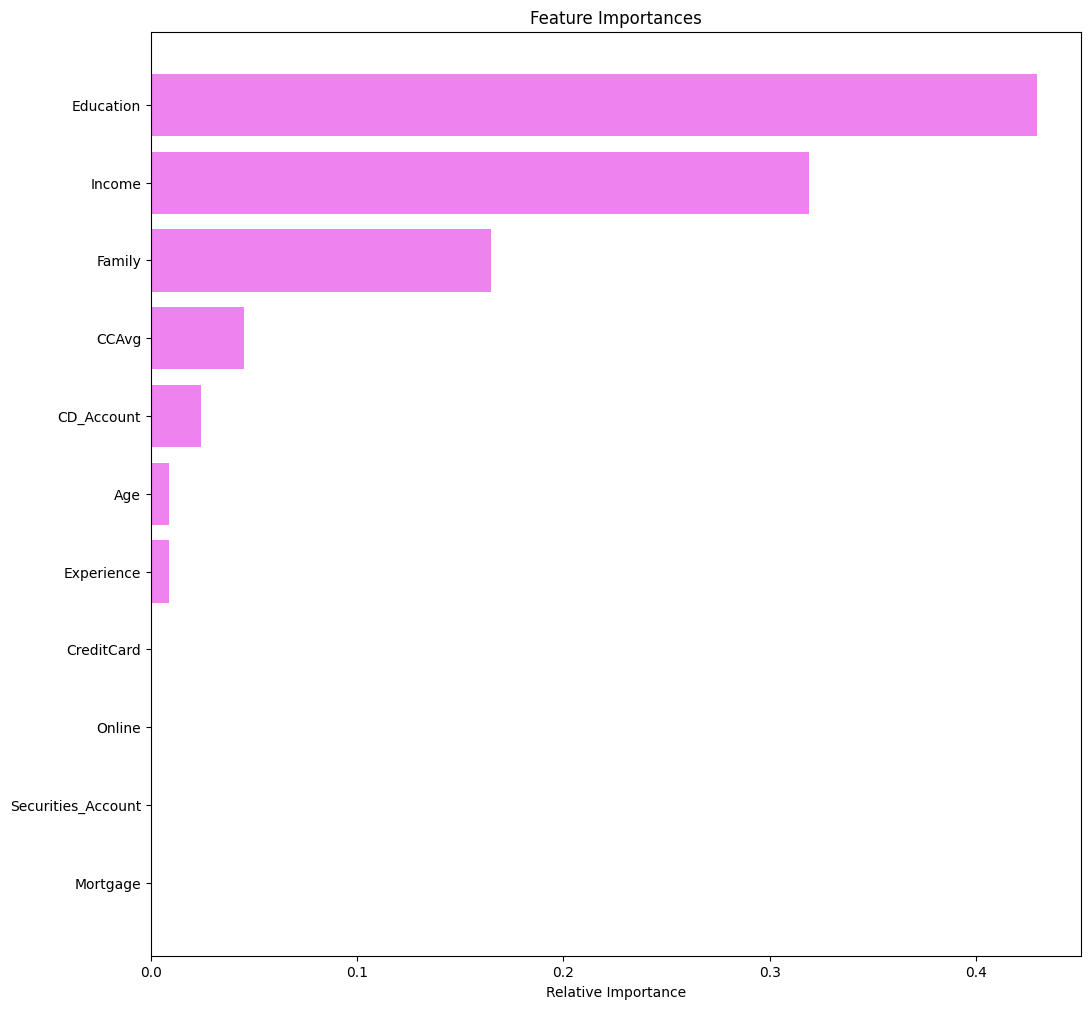

In [ ]:
#Graph Plotting
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Education, Income, Family, and CCAvg are now the top 4 important features after post pruning

**Decision Tree Summary**

**Decision Tree Training Set Summary**

In [ ]:
#Data frame to encompass performance summary on training set
models_train_comp_df = pd.concat(
    [
        decision_tree_performance_default.T,
        decision_tree_train_tuned.T,
        tree_postprun_performance_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.00000,0.99743,0.99314
Recall,1.00000,0.97281,0.96375
Precision,1.00000,1.00000,0.96375
F1,1.00000,0.98622,0.96375


In [ ]:
#Data frame to encompass performance summary on testing set
models_train_comp_df = pd.concat(
    [
        decision_tree_performance_test.T,
        decision_tree_test_preprunned.T,
        tree_postprun_performance_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.98000,0.98133,0.98400
Recall,0.88591,0.87248,0.90604
Precision,0.91034,0.93525,0.93103
F1,0.89796,0.90278,0.91837


**Decision Tree Comments & Conclusions**

•	Running the model without pre/post pruning gives a high score which is expected due to the overfitting nature of decision trees

•	The decision tree model performs well on the testing set with an accuracy of 0.99, precision of 0.96, recall of 0.96, and F1 score of 0.96 after post-pruning on the training set

•	After post-pruning, we observe a better precision of .93, F1 score of 0.91, recall of 0.90, and accuracy of 0.98 on the testing set

•	We also observe a simplified tree after post-pruning.

•	We can conclude the post-pruned model of the decision tree performs best as it gives the best recall scores



**Actionable Insights & Recommendations**

**Decision Tree/Logistic Regression Model Comparision**

•	The optimized logistic regression model with a 0.37 threshold gives an overall performance score of recall= 0.71, precision=0.77 and F1 score=0.74 on the training set

•	The optimized logistic regression model with a 0.37 threshold gives an overall performance score of precision = 0.66, recall = 0.75, accuracy=0.93 and F1 score = 0.71 on the testing set

•	The post-pruned decision tree model performs much better with a precision score of .93, F1 score of 0.91, recall of 0.90, and an accuracy of 0.98

•	**To provide an accurate prediction of customers who will accept personal loans, we recommend the post-pruned decision tree model to the business**



**Key Takeaways for the Marketing Team**

• From the logistic regression and decision tree models, we identified that Age, Family Size, Education Level, Mortgage, CCAvg, and CD Account are the most important variables in determining if a customer will accept a Personal Loan or not.

• Customers at the age of 35-40, family sizes of 1 and above, with education level of undergraduate and above are a good target for the new loan product. These segments represent customers with many needs and are most likely to uptake.

• Customers with mortgages of above 100k USD also represent a good target for the new loan product. These customers probably need the personal loan due to high loan repayment installments that cut into their budgets.

• On the other hand, customers with a high average spending on credit are good targets for personal loans but precautions should be taken as they could also pose a risk of default.

• The marketing team should also consider targeting customers with CD accounts. These customers pose less risk as their deposits can be used as collateral for personal loans where needed.

• Customers with a longer working experience are likely to reject personal loan offers from the bank which makes sense because these are probably customers on the verge of retirement and are in no need of personal loans. The marketing team should avoid this segment of customers.

• Customers with online internet banking systems are also likely to reject personal loan offers from the bank. These are customers who only need transacting services from the bank and targeted marketing of these clients might not yield any fruit.

• The marketing team should also target high-income customers with mortgages and high CCAvg as they pose less risk of repayment but have steady cash flow.

• The bank can try to find new combinations of variables in a bid to improve the model continuously

